In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:85% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

- 공공데이터 포털에 있는 데이터를 Pandas의 melt, concat, transpose와 같은 reshape 기능을 활용해 분석
- groupby, pivot_table, info, describe, value_counts등을 통한 데이터 요약과 분석
- 이를 통해 전혀 다른 두 데이터의 정제와 병합, 수치형 데이터의 차이를 이해하고 다양한 그래프로 시각화(barplot, lineplot, scatterplot, lmplot, swarmplot, histplot)

# 1. 패키지로드 & 한글설정 & 경고메세지 ignore

In [65]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# 다른 폰트를 기본으로 하려면
#import matplotlib.font_manager as fm
##font_file = r"C:\Windows\Fonts\MaruBuri\MaruBuri-Regular.ttf"
#font_name = fm.FontProperties(fname=font_file).get_name()
#print(font_name)
#plt.rc('font', family=font_name)
 
# warning(경고) 안보이게
import warnings
warnings.filterwarnings(action='default')  # 기본값, 경고 메세지 나오게 할때
# warnings.filterwarnings(action='ignore')  # 경고 메세지 무시

# 2. 데이터 다운로드
- https://www.data.go.kr 에서 "아파트 분양 가격"을 검색한 csv 다운로드

## (1) 2013년9월부터 2015년8월까지 데이터는 df_first 변수에 담아 탐색

In [16]:
%ls "c:/ai_x/download/shareData/부동산_250213/"

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 3664-591E

 c:\ai_x\download\shareData\부동산_250213 디렉터리

2025-05-07  오전 09:57    <DIR>          .
2025-05-07  오전 09:57    <DIR>          ..
2021-01-02  오후 03:44             2,163 전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv
2025-04-30  오후 04:55           412,540 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv
               2개 파일             414,703 바이트
               2개 디렉터리  145,428,303,872 바이트 남음


In [51]:
df_first = pd.read_csv(r'c:/ai_x/download/shareData/부동산_250213/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', 
                       encoding='cp949')
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [18]:
df_first.shape

(17, 22)

In [58]:
pd.options.display.max_columns =22
df_first.tail(2)

,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
지역,,,,,,,,,,,,,,,,,,,,,
경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,6767,6881,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,7833,7724,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


In [24]:
df_first.notnull().sum() # notna(), notnull() : 결측치가 아닌 데이터 수 확인
df_first.isna().sum()  # isna(), isnull() : 결측치 여부 확인

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [25]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [54]:
# set_index('열이름') : 열을 인덱스로 세팅
# reset_index() : 인덱스를 열로 세팅
df_first.set_index('지역', inplace=True)

- color map 참조 : https://matplotlib.org/stable/users/explain/colors/colormaps.html

<Axes: ylabel='지역'>

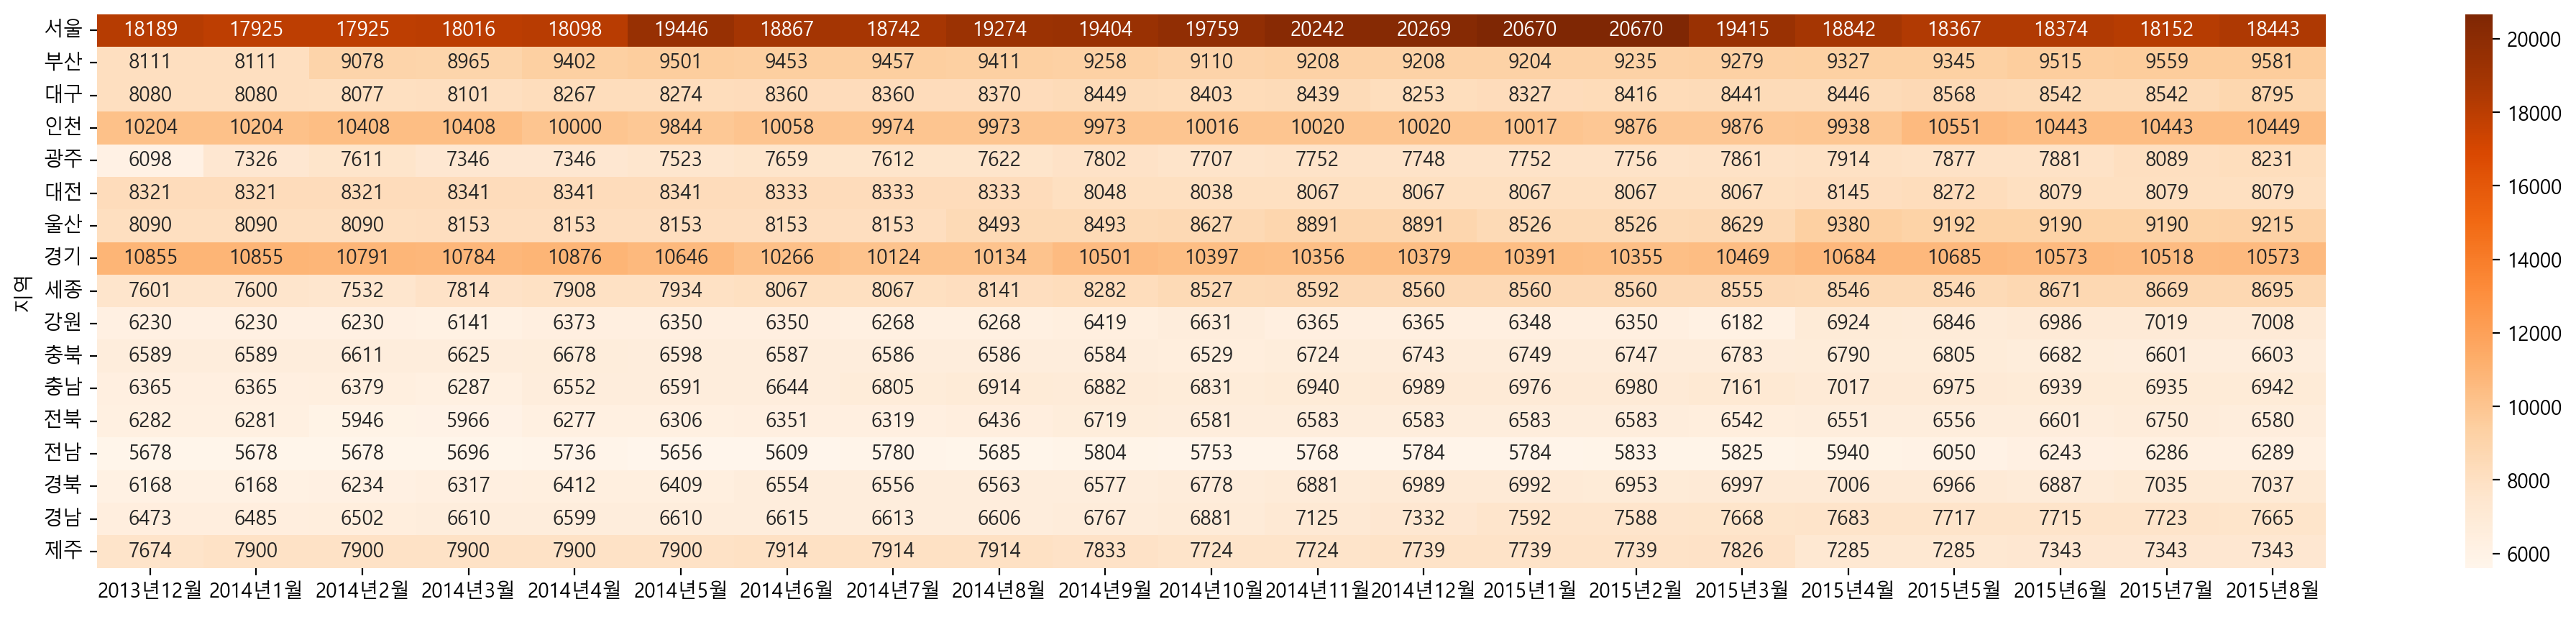

In [66]:
plt.figure(figsize=(25,5))
sns.heatmap(df_first, annot=True, 
            fmt='d',   #포맷을 지수형 -> 정수형으로 변경
            cmap='Oranges')

## (2) 2015이후 데이터 분양가격에 간헐적으로 comma(,) 추가하여 csv로 출력
- 분양가격에 np.nan, '', '   ', 8111, -> np.nan, '', '   ', 8111, "8,111" 

In [83]:
ex = pd.read_csv(r'c:/ai_x/download/shareData/부동산_250213/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv',
                     encoding='cp949')

In [84]:
ex.sample(2)

,지역명,규모구분,연도,월,분양가격(제곱미터)
8776,대구,전용면적 60제곱미터이하,2024,5,
1386,광주,전용면적 60제곱미터이하,2017,2,2557


In [89]:
# isna(), isnull() - 결측치 여부
# notnull(), notna() - 결측치가 아닌지 여부
print('전체갯수 : ', ex.shape[0])
print('결측치 아닌 갯수 : ', ex['분양가격(제곱미터)'].notna().sum())
print('결측치 갯수 : ', ex['분양가격(제곱미터)'].isna().sum())

전체갯수 :  9095
결측치 아닌 갯수 :  8481
결측치 갯수 :  614


In [88]:
# 분양가격(제곱미터)가 결측치인 행 상위2개
ex[ex['분양가격(제곱미터)'].isna()].head(2)  # 조건식

,지역명,규모구분,연도,월,분양가격(제곱미터)
368,광주,전용면적 85제곱미터초과 102제곱미터이하,2016,2,NaN
369,광주,전용면적 102제곱미터초과,2016,2,NaN


In [90]:
type(ex.loc[368, '분양가격(제곱미터)']), type(ex.loc[7209, '분양가격(제곱미터)'])

(float, str)

In [94]:
# 분양가격(제곱미터) 컬럼의 type을 float64로 타입 변환 : astype(), pd.to_numeric()
# ex['분양가격(제곱미터)'].astype('float')  # 에러 이유 : '  '
# pd.to_numeric(ex['분양가격(제곱미터)'], errors='coerce')  # 에러 이유 : '  ',  errors='coerce' 에러가 나면 결측치로 바꿔준다
pd.to_numeric(ex['분양가격(제곱미터)'], errors='coerce').isna().sum()

740

In [98]:
# 분양가격(제곱미터) 컬럼이 space인 행 : 740- 614 = 126
ex[ex['분양가격(제곱미터)'].str.strip() == ''].head(2)

,지역명,규모구분,연도,월,분양가격(제곱미터)
28,광주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,
29,광주,전용면적 102제곱미터초과,2015,10,


In [104]:
nanex= ex.loc[368] # 분양가격이 결측치
spaceex = ex.loc[28] # 분양가격이 space
ex.loc[0] # 분양가격이 정상

지역명             서울
규모구분          모든면적
연도            2015
월               10
분양가격(제곱미터)    5841
Name: 0, dtype: object

In [106]:
# 분양가격이 nan이거나 space면 0, 그외 분양가격의 문자자리수를 return하는 함수
def get_pricelen(row):
    price = row['분양가격(제곱미터)']
#    np.isnan(스칼라변수) : 스칼라 변수가 결측치인지(np.nan)인지 여부
#    pd.isna(스칼라변수) : 스칼라 변수가 결측치인지(np.nan, None)인지 여부
#    pd.notnull(스칼라변수) : 결측치가 아닌지 여부
#    price.isna() 은 1차원이나, 2차원일때 결측치 여부를 반환, 스칼라 변수에는 사용 불가
    if pd.notnull(price) and price.strip()!='':
        return len(price)
    else:
        return 0


get_pricelen(nanex), get_pricelen(spaceex), get_pricelen(ex.loc[0])

(0, 0, 4)

In [111]:
ex['자리수'] = ex.apply(get_pricelen, axis=1)
ex.자리수.unique()

array([4, 0, 5], dtype=int64)

In [114]:
ex.index.name = 'idx'
ex.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
idx,,,,,,
0,서울,모든면적,2015,10,5841,4
1,서울,전용면적 60제곱미터이하,2015,10,5652,4
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,4
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,4
4,서울,전용면적 102제곱미터초과,2015,10,5879,4


In [130]:
ex = ex.reset_index()
ex.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       5 non-null      int64 
 1   idx         5 non-null      int64 
 2   지역명         5 non-null      object
 3   규모구분        5 non-null      object
 4   연도          5 non-null      int64 
 5   월           5 non-null      int64 
 6   분양가격(제곱미터)  5 non-null      object
 7   자리수         5 non-null      int64 
dtypes: int64(5), object(3)
memory usage: 448.0+ bytes


In [128]:
# 자리수가 5이면서, idx가 5의 배수
ex[(ex['자리수'] ==5) & (ex.idx%5==0)].head()

#x='12345'
#x[:-3]+','+x[-3:]
nanex= ex.loc[368] # 분양가격이 결측치
spaceex = ex.loc[28] # 분양가격이 space
ex.loc[0] # 분양가격이 정상

idx              0
지역명             서울
규모구분          모든면적
연도            2015
월               10
분양가격(제곱미터)    5841
자리수              4
Name: 0, dtype: object

In [133]:
# 2022년 데이터 흉내내기 위한 함수  : nan, ' ', '  ', '5123', '5,123'
def comma_append(row):
    price = row['분양가격(제곱미터)']
    if (row['자리수'] >= 4) & (row.idx%5==0):
        price = price[:-3]+','+price[-3:]
    return price


    
    
comma_append(nanex), comma_append(spaceex), comma_append(ex.loc[1]),\
comma_append(ex.loc[0]), comma_append(ex.loc[8330])

(nan, '  ', '5652', '5,841', '10,590')

In [136]:
ex['분양가격(제곱미터)'] = ex.apply(comma_append, axis=1)
ex.head()

,index,idx,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
0,0,0,서울,모든면적,2015,10,"5,841",4
1,1,1,서울,전용면적 60제곱미터이하,2015,10,5652,4
2,2,2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,4
3,3,3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,4
4,4,4,서울,전용면적 102제곱미터초과,2015,10,5879,4


In [143]:
ex.head(6)
nanex.to_frame().T
ex[368:369]

,index,idx,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
368,368,368,광주,전용면적 85제곱미터초과 102제곱미터이하,2016,2,NaN,0


In [147]:
ex.drop(['idx', '자리수'], axis=1, inplace=True)

In [155]:
ex.drop('index', axis=1, inplace=True)

In [156]:
ex.head(1)

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,"5,841"


In [157]:
# 간헐적으로 평당분양가에 ,가 있거나(5개마다) np.nan이 있거나 space가 있는 데이터 csv로 백업
ex.to_csv('data/ch13_예1_포트폴리오_아파트분양가분석.csv', index=False, encoding='cp949')

## (3) 이후 데이터는 df_last 변수에 담아 탐색

In [158]:
df_last = pd.read_csv('data/ch13_예1_포트폴리오_아파트분양가분석.csv', encoding='cp949')
df_last

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,"5,841"
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879
...,...,...,...,...,...
9090,제주,모든면적,2024,8,"7,703"
9091,제주,전용면적 60제곱미터이하,2024,8,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN


In [167]:
# 데이터 요약
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         9095 non-null   object
 1   규모구분        9095 non-null   object
 2   연도          9095 non-null   int64 
 3   월           9095 non-null   int64 
 4   분양가격(제곱미터)  8481 non-null   object
dtypes: int64(2), object(3)
memory usage: 355.4+ KB


# 3. df_last의 데이터 결측치를 확인하고 대체 고민

In [164]:
# 열별 결측치 갯수
df_last.isna().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    614
dtype: int64

In [165]:
# 열별 결측치를 제외한 갯수
df_last.notna().sum()

지역명           9095
규모구분          9095
연도            9095
월             9095
분양가격(제곱미터)    8481
dtype: int64

# 4. df_last 데이셋에 평당분양가격컬럼 추가

## (1) astype('float')나 pd.to_numeric() 사용
## (2) 6,222 => 6222 수정, space가 저장된 경우 nan으로 수정하는 함수를 apply나 map적용
## (3) df_last['분양가격(제곱미터)']*3.3

In [ ]:
# , 와 space 때문에 에러
# ,와 space를 제거

### apply

In [169]:
# 콤마가 있는 문자에서 콤마 없애기 방법1
temp = '12,523'
temp = temp.replace(',','')
temp

'12523'

In [170]:
# 콤마가 있는 문자에서 콤마 없애기 방법2
temp = '12,523'
tempsplited = temp.split(',')
''.join(tempsplited)

'12523'

In [175]:
# 분양가격 컬럼에 콤마(,)가 있는 경우 콤마(,)를 제거('5,123' -> '5123')
# 공백문자가 있는 경우 np.nan로 바꾸는 함수
def commadrop(row):
    # pd.options.mode.copy_on_write = True
    row = row.copy()
    price = row['분양가격(제곱미터)']
    if pd.isna(price):  # np.nan 이거나 None인지 여부
        row['제곱미터분양가격'] = np.nan
    elif price.strip() =='' : # space면 np.nan으로
        row['제곱미터분양가격'] = np.nan
    elif price.find(',') != -1: # 콤마가 있으면 콤마 없애기
        row['제곱미터분양가격'] = price.replace(',', '')
        # row['분양가격(제곱미터)'] = ''.join(price.split(','))
    else:
        row['제곱미터분양가격'] = price
    return row

commadrop(df_last.loc[0]) # 콤마 제외
commadrop(df_last.loc[1]) # 그대로
commadrop(df_last.loc[28]) # 공백문자의 경우 nan
commadrop(df_last.loc[368]) # nan의 경우 nan

지역명                                광주
규모구분          전용면적 85제곱미터초과 102제곱미터이하
연도                               2016
월                                   2
분양가격(제곱미터)                        NaN
제곱미터분양가격                          NaN
Name: 368, dtype: object

In [180]:
%%time
# 공백문자는 결측치로, 콤마는 제거하기를 모든 행에 적용
df_last = df_last.apply(commadrop, axis=1)
df_last.head()

CPU times: total: 1.69 s
Wall time: 1.66 s


,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터분양가격
0,서울,모든면적,2015,10,"5,841",5841
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879


In [182]:
df_last['제곱미터분양가격'] = df_last['제곱미터분양가격'].astype(np.float64)

In [183]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8481 non-null   object 
 5   제곱미터분양가격    8355 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 426.5+ KB


### map

In [185]:
df_last.drop(['제곱미터분양가격'], axis=1, inplace=True)
df_last.sample(1)

,지역명,규모구분,연도,월,분양가격(제곱미터)
1358,제주,전용면적 85제곱미터초과 102제곱미터이하,2017,1,3157


In [186]:
df_last['분양가격(제곱미터)']

0       5,841
1        5652
2        5882
3        5721
4        5879
        ...  
9090    7,703
9091      NaN
9092     7515
9093      NaN
9094     7950
Name: 분양가격(제곱미터), Length: 9095, dtype: object

In [191]:
# 결측치->결측치 return, 공백문자->결측치 return, '3,198' -> 3198 return, '3198'->3198 return,  
def commadrop2(price):
#     if price is np.nan:
#     if np.isnan(price):
    if pd.isna(price):
        return np.nan
    elif price.strip() =='':
        return np.nan
    elif price.find(',') != -1:
        return int(price.replace(',',''))
    else:
        return int(price)

commadrop2(df_last.loc[0, '분양가격(제곱미터)']) # 콤마제외한 문자를 숫자로 
commadrop2(df_last.loc[1, '분양가격(제곱미터)']) # 콤마없는 문자를 숫자로 
commadrop2(df_last.loc[28, '분양가격(제곱미터)']) # 공백문자를 nan
commadrop2(df_last.loc[368, '분양가격(제곱미터)']) # nan을 nan

nan

- apply(함수, axis) : 1차원, 2차원(axis 지정. axis기본값0)
- map(함수) : 1차원
- applymap(함수) : 2차원(모든 요소들에 함수를 적용)

In [194]:
df_last['제곱미터당분양가격'] = df_last['분양가격(제곱미터)'].apply(commadrop2)
df_last

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격
0,서울,모든면적,2015,10,"5,841",5841.0
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0
...,...,...,...,...,...,...
9090,제주,모든면적,2024,8,"7,703",7703.0
9091,제주,전용면적 60제곱미터이하,2024,8,NaN,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515,7515.0
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN,NaN


In [195]:
df_last['제곱미터당분양가격'] = df_last['분양가격(제곱미터)'].map(commadrop2)
df_last

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격
0,서울,모든면적,2015,10,"5,841",5841.0
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0
...,...,...,...,...,...,...
9090,제주,모든면적,2024,8,"7,703",7703.0
9091,제주,전용면적 60제곱미터이하,2024,8,NaN,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515,7515.0
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN,NaN


In [196]:
df_last.dtypes

지역명            object
규모구분           object
연도              int64
월               int64
분양가격(제곱미터)     object
제곱미터당분양가격     float64
dtype: object

In [198]:
# 평당 분양가격 추가
df_last['평당분양가격'] = df_last['제곱미터당분양가격']*3.3
df_last['평당분양가격'] 

0       19275.3
1       18651.6
2       19410.6
3       18879.3
4       19400.7
         ...   
9090    25419.9
9091        NaN
9092    24799.5
9093        NaN
9094    26235.0
Name: 평당분양가격, Length: 9095, dtype: float64

In [199]:
df_last

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격,평당분양가격
0,서울,모든면적,2015,10,"5,841",5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0,19400.7
...,...,...,...,...,...,...,...
9090,제주,모든면적,2024,8,"7,703",7703.0,25419.9
9091,제주,전용면적 60제곱미터이하,2024,8,NaN,NaN,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515,7515.0,24799.5
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN,NaN,NaN


# 5. df_last 데이터셋에서 전용면적 컬럼을 추가한다
- 전용면적 컬럼, 필요없는 컬럼 처리로 메모리 절약

In [201]:
# 기존 용량 497.5+KB, 규모구분에 중복된 단어가 많음. 메모리 
# 절약 방안 : 규모구분 中 전용면적 -> 삭제, 제곱미터 -> m², 초과 -> ~
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적', '')\
                    .str.replace('제곱미터', 'm²')\
                    .str.replace('초과', '~')\
                    .str.replace('이하', '')\
                    .str.replace(' ', '')

In [204]:
df_last['규모구분'].unique()
df_last['전용면적'].unique()

array(['모든면적', '60m²', '60m²~85m²', '85m²~102m²', '102m²~'], dtype=object)

# 6. 메모리 사용량을 줄이기 위해 불필요한 컬럼 제거

In [209]:
df_last = df_last.drop(['규모구분','분양가격(제곱미터)','제곱미터당분양가격'], axis=1)

In [211]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     9095 non-null   object 
 1   연도      9095 non-null   int64  
 2   월       9095 non-null   int64  
 3   평당분양가격  8355 non-null   float64
 4   전용면적    9095 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 355.4+ KB


In [212]:
df_last.to_csv('data/df_last.csv', index=False) # 전처리 단계 백업

# 7. 데이터 집계
- GroupBy(unstack()함수 이용) vs. pivot_table()
- GroupBy가 조금 시간이 적게 걸릴 수 있음
- 우선 결측치 대체전 데이터 집계와 시각화를 할 예정

- df_last.groupby(["인덱스로사용할컬럼명"])["계산할컬럼명"].연산함수()
- df_last.pivot_table(index=["인덱스로사용할컬럼명"],
                    values=["계산할컬럼명"],
                    aggfunc="연산함수명")
- pd.pivot_table(df_last, index=["인덱스로사용할컬럼명"],
                    values=["계산할컬럼명"],
                    aggfunc="연산함수명")

## (1) 지역별 데이터수

In [220]:
# 지역별 데이터 행수를 정렬하여 출력
df_last.groupby('지역명')['전용면적'].count() # 결측치 포함
df_last.groupby('지역명')['평당분양가격'].count() # 결측치 제외 : 결과가 1차원 시리즈
df_last.groupby('지역명')['평당분양가격'].count().sort_values(ascending=False)  # 내림차순 정렬

지역명
경기    535
충북    533
부산    533
인천    531
서울    527
강원    523
전북    520
경남    516
충남    516
경북    511
전남    507
대구    495
광주    450
제주    439
대전    415
세종    409
울산    395
Name: 평당분양가격, dtype: int64

In [229]:
# # 지역별 데이터 행수 2ckdnjs
# df_last.groupby('지역명')['평당분양가격'].count().to_frame()
# df_last.groupby('지역명')[['평당분양가격']].count()
# df_last.groupby('지역명', as_index=False)['평당분양가격'].count() # 지역명이 컬럼명
# df_last.groupby('지역명')['평당분양가격'].count().reset_index() # 지역명이 컬럼명
df_last.groupby('지역명')['평당분양가격'].count().to_frame().T  

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
평당분양가격,523,535,516,511,450,495,415,533,527,409,395,531,507,520,439,516,533


In [231]:
# pivot_table 이용, 결과는 데이터프레임
df_last.pivot_table(index='지역명', 
                    values = '평당분양가격',
                    aggfunc= 'count').T

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
평당분양가격,523,535,516,511,450,495,415,533,527,409,395,531,507,520,439,516,533


## (2) 지역별 평당분양가격(평균, 최대값, ... 요약통계량)

In [241]:
df_last.pivot_table(index='지역명', 
                    values = '평당분양가격',
                    aggfunc= 'mean').T.round(2)

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
평당분양가격,10078.72,15420.03,10776.96,10261.55,12998.22,14434.52,12829.57,14896.95,27755.4,10741.83,13958.2,14513.23,9224.33,8886.2,15912.43,9769.54,8896.58


In [239]:
df_last.pivot_table(index='지역명', 
                    values = '평당분양가격',
                    aggfunc= 'max').T

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
평당분양가격,17806.8,24172.5,16566.0,15345.0,24951.3,30600.9,30851.7,31904.4,61917.9,21087.0,27815.7,54723.9,15087.6,14774.1,27753.0,14932.5,13685.1


In [254]:
df_last.pivot_table(index='지역명', 
                    values = '평당분양가격',
                    aggfunc= 'min').sort_values(by='평당분양가격', ascending=False).T

지역명,서울,경기,부산,인천,세종,대구,대전,울산,광주,제주,경남,경북,충남,강원,전남,전북,충북
평당분양가격,16701.3,10160.7,9669.0,9537.0,8487.6,8259.9,8002.5,7992.6,7428.3,7342.5,7260.0,6949.8,6926.7,6639.6,6289.8,6270.0,6164.4


In [252]:
df_last.groupby('지역명')['평당분양가격'].describe().sort_values(by='mean', ascending=False).T.round(2)

지역명,서울,제주,경기,부산,인천,대구,울산,광주,대전,경남,세종,경북,강원,충남,전남,충북,전북
count,527.00,439.00,535.00,533.00,531.00,495.00,395.00,450.00,415.00,516.00,409.00,511.00,523.00,516.00,507.00,533.00,520.00
mean,27755.40,15912.43,15420.03,14896.95,14513.23,14434.52,13958.20,12998.22,12829.57,10776.96,10741.83,10261.55,10078.72,9769.54,9224.33,8896.58,8886.20
std,6566.39,6039.01,3245.86,4059.94,3999.85,3407.30,4060.18,3637.56,4191.69,2223.56,1638.79,2276.03,2828.91,2000.59,2092.04,1769.45,1660.65
min,16701.30,7342.50,10160.70,9669.00,9537.00,8259.90,7992.60,7428.30,8002.50,7260.00,8487.60,6949.80,6639.60,6926.70,6289.80,6164.40,6270.00
25%,22497.75,10645.80,13274.25,12467.40,11398.20,11949.30,10312.50,9554.33,9401.70,9187.20,9101.40,8378.70,7652.70,8141.10,7613.10,7543.80,7661.78
50%,26763.00,13500.30,14652.00,13411.20,14652.00,14711.40,13827.00,12673.65,11820.60,10254.75,10523.70,9705.30,9428.10,9124.50,8669.10,8596.50,8679.00
75%,31054.65,21908.70,17168.25,17301.90,16214.55,16338.30,17602.20,15213.00,15310.35,12031.80,12266.10,12500.40,11873.40,11740.58,10627.65,9906.60,9986.62
max,61917.90,27753.00,24172.50,31904.40,54723.90,30600.90,27815.70,24951.30,30851.70,16566.00,21087.00,15345.00,17806.80,14932.50,15087.60,13685.10,14774.10


In [274]:
df_last.pivot_table(index='지역명', 
                    values = '평당분양가격',
                    aggfunc= 'describe').T.round(2)
#                     aggfunc= 'describe').applymap(lambda x: round(x,1))  applymap 함수와 람다식으로 가능

,25%,50%,75%,count,max,mean,min,std
지역명,,,,,,,,
강원,7652.700,9428.10,11873.400,523.0,17806.8,10078.717400,6639.6,2828.907867
경기,13274.250,14652.00,17168.250,535.0,24172.5,15420.030280,10160.7,3245.863323
경남,9187.200,10254.75,12031.800,516.0,16566.0,10776.955814,7260.0,2223.562736
경북,8378.700,9705.30,12500.400,511.0,15345.0,10261.553425,6949.8,2276.026239
광주,9554.325,12673.65,15213.000,450.0,24951.3,12998.216000,7428.3,3637.557312
대구,11949.300,14711.40,16338.300,495.0,30600.9,14434.520000,8259.9,3407.303427
대전,9401.700,11820.60,15310.350,415.0,30851.7,12829.565060,8002.5,4191.685609
부산,12467.400,13411.20,17301.900,533.0,31904.4,14896.949156,9669.0,4059.939958
서울,22497.750,26763.00,31054.650,527.0,61917.9,27755.404554,16701.3,6566.391764


## (3) 전용면적별 평당분양가격(평균)

In [261]:
df_last.groupby('전용면적')[['평당분양가격']].mean().sort_values(by='평당분양가격',ascending=False)

,평당분양가격
전용면적,
102m²~,14066.826846
85m²~102m²,13447.672835
모든면적,12654.068098
60m²~85m²,12619.048827
60m²,12522.774427


In [262]:
df_last.pivot_table(index='전용면적', 
                    values = '평당분양가격',
                    aggfunc= 'mean').sort_values(by='평당분양가격', ascending=False)

,평당분양가격
전용면적,
102m²~,14066.826846
85m²~102m²,13447.672835
모든면적,12654.068098
60m²~85m²,12619.048827
60m²,12522.774427


## (4) 지역별, 전용면적별 평당분양가격(평균)

In [268]:
df_last.groupby(['지역명','전용면적'])[['평당분양가격']].mean().sort_values(by='지역명')

평당분양가격
지역명 전용면적                    
강원  102m²~      11314.805607
    60m²         9441.885981
    60m²~85m²    9383.472897
    85m²~102m²  10795.481053
    모든면적         9538.326168
...                      ...
충북  60m²~85m²    8558.503738
    85m²~102m²   9418.420000
    102m²~       9369.532710
    60m²         8598.227103
    모든면적         8547.986916

[85 rows x 1 columns]

In [297]:
# 그룹화된 레벨0은 그대로 두고 레벨 1을 칼럼으로 옮기려면!
r = df_last.pivot_table(index = '지역명',
                    columns= '전용면적',
                   values = '평당분양가격',
                   aggfunc= 'mean').round(1)
# 여기에 정렬을 하고 싶다면?
r = r[['60m²', '60m²~85m²', '85m²~102m²', '102m²~', '모든면적']]  # 컬럼 정렬 순서 조정
r

전용면적,60m²,60m²~85m²,85m²~102m²,102m²~,모든면적
지역명,,,,,
강원,9441.9,9383.5,10795.5,11314.8,9538.3
경기,15291.2,14787.2,15739.9,16559.1,14722.8
경남,10122.2,10107.8,12150.6,11522.5,10146.5
경북,9731.9,9828.3,10968.3,11060.6,9856.6
광주,12254.0,12656.0,12291.7,14749.2,12798.4
대구,13748.4,14494.4,13713.9,15564.0,14516.5
대전,11834.2,11920.1,13002.6,17662.0,11947.6
부산,14448.6,14745.0,14801.0,15741.4,14764.5
서울,27371.2,26662.6,28972.2,29035.9,26829.7


<Axes: xlabel='전용면적', ylabel='지역명'>

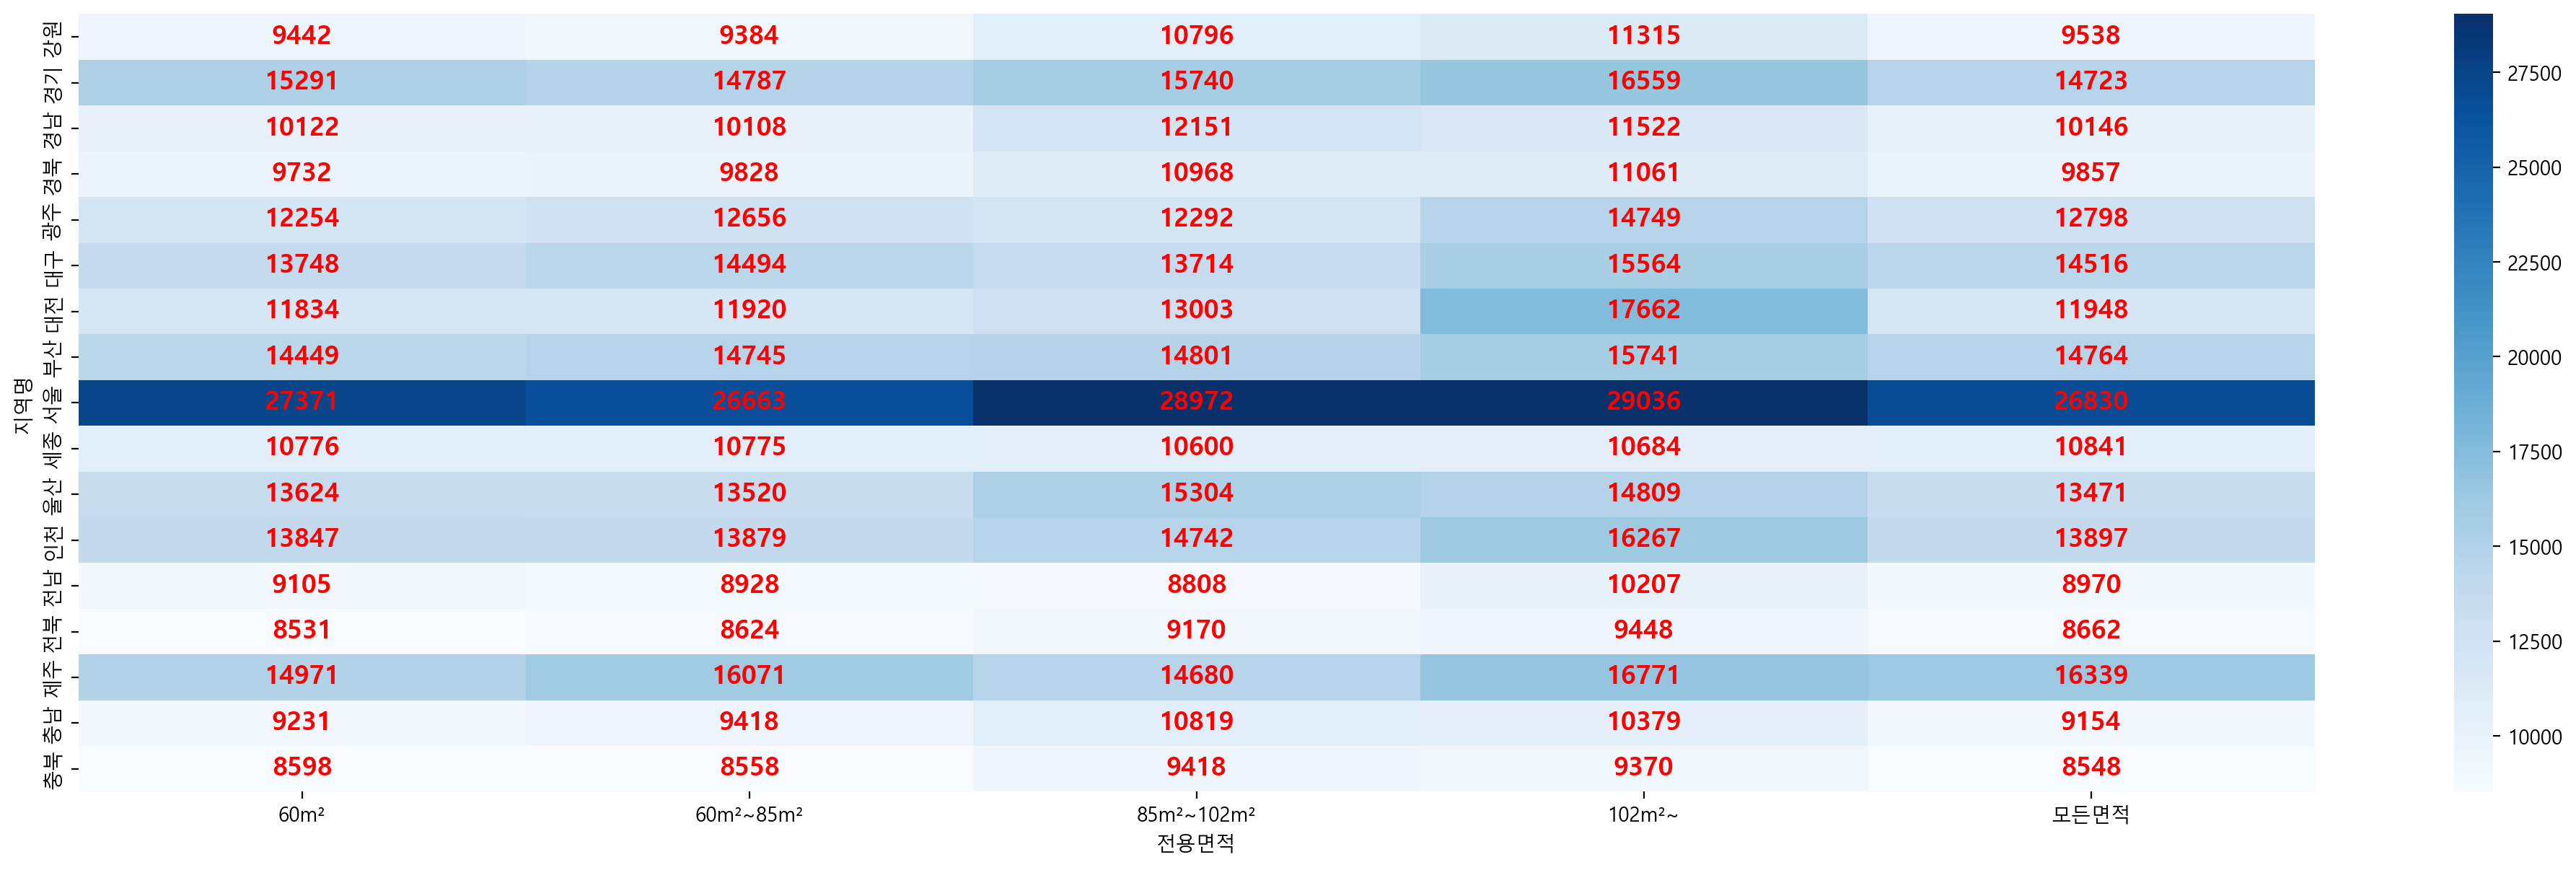

In [299]:
plt.figure(figsize=(25,7))
sns.heatmap(r, cmap='Blues', annot=True, fmt='.0f',
           annot_kws={'size':13, 'weight':'bold', 'color':'red'})

## (5) 연도, 지역별 평당분양가격(평균)

In [300]:
df_last.groupby(['연도', '지역명'])[['평당분양가격']].mean().round(1)

평당분양가격
연도   지역명         
2015 강원    7188.1
     경기   11060.9
     경남    8459.2
     경북    7464.2
     광주    7916.7
...           ...
2024 전남   13540.4
     전북   12400.9
     제주   25096.1
     충남   12739.6
     충북   12851.8

[170 rows x 1 columns]

In [275]:
df_last.pivot_table(index = ['연도', '지역명'],
                   values = '평당분양가격',
                   aggfunc= 'mean').applymap(lambda x : round(x,1))

평당분양가격
연도   지역명         
2015 강원    7188.1
     경기   11060.9
     경남    8459.2
     경북    7464.2
     광주    7916.7
...           ...
2024 전남   13540.4
     전북   12400.9
     제주   25096.1
     충남   12739.6
     충북   12851.8

[170 rows x 1 columns]

In [305]:
# 2차원 인덱스 중 레벨0 인덱스는 그대로, 레벨1 인덱스는 칼럼으로 올리기
r = df_last.pivot_table(index = ['연도', '지역명'],
                   values = '평당분양가격',
                   aggfunc= 'mean').applymap(lambda x : round(x,1))
r.unstack()

# pivot_table에 매개변수 하나 추가로 똑같이 구현가능
r = df_last.pivot_table(index = '연도', 
                    columns= '지역명',
                   values = '평당분양가격',
                   aggfunc= 'mean').applymap(lambda x : round(x,1))

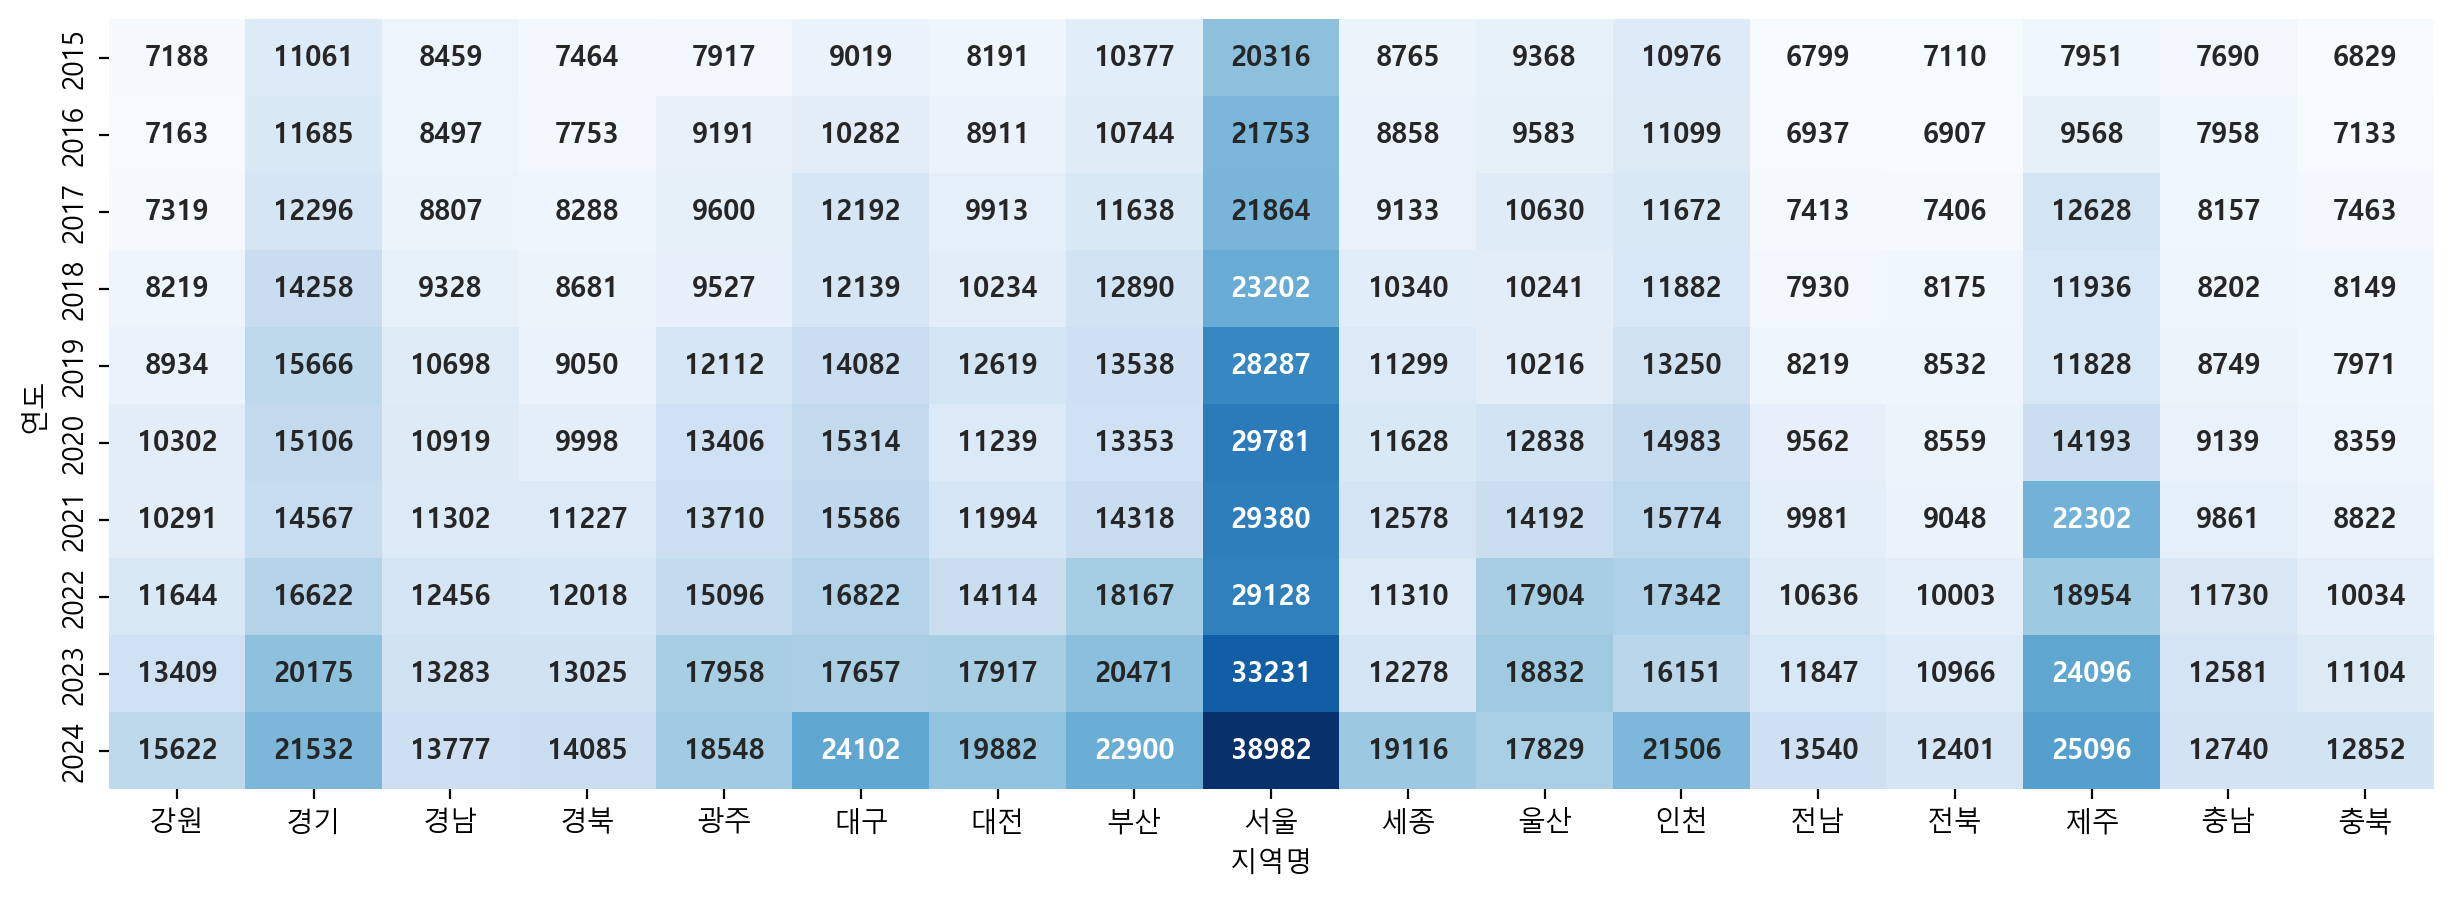

In [307]:
plt.figure(figsize=(15,5))
sns.heatmap(r, annot=True, fmt='.0f', cmap='Blues',
           annot_kws={'weight':'bold'}, 
            cbar=False)
plt.show()

- color map 참조 : https://matplotlib.org/stable/users/explain/colors/colormaps.html

# 8. matplotlib으로 시각화(위의 도표)
https://www.research.autodesk.com/publications/same-stats-different-graphs/
- 동일한 통계, 다른분포
## (1) 지역별 결측치를 제외한 데이터수(line, bar)

In [309]:
df_last_mat = df_last.pivot_table(index = '지역명',
                   values = '평당분양가격',
                   aggfunc= 'count').sort_values(by = '평당분양가격', ascending=False)

In [338]:
df_last_mat

,평당분양가격
지역명,
경기,535
충북,533
부산,533
인천,531
서울,527
강원,523
전북,520
경남,516
충남,516


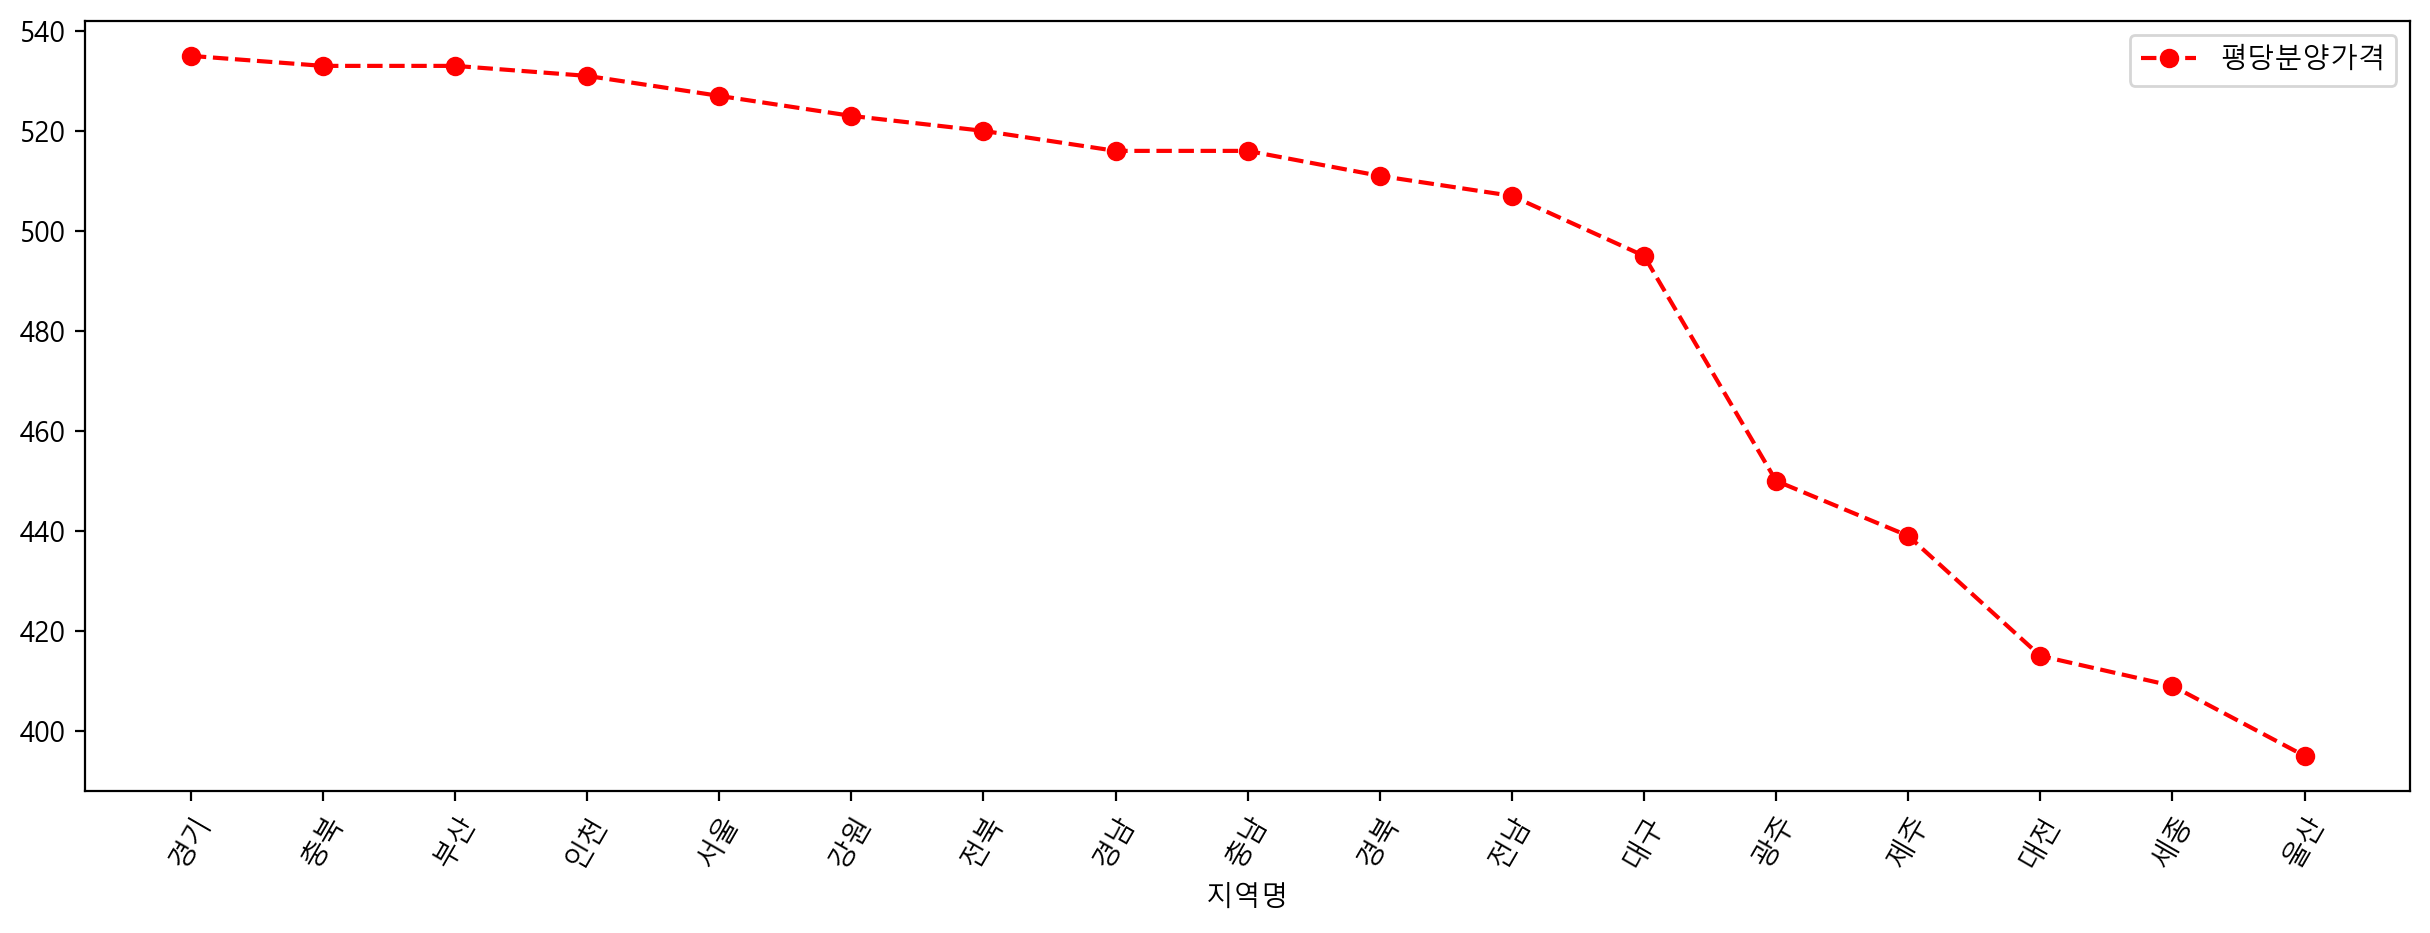

In [341]:
ax = df_last_mat.plot(kind='line',figsize=(15,5), style='--', color = 'r', marker = 'o')
ax.set_xticks(range(len(df_last_mat)))   # x 눈금을 df_last_mat 데이터 개수만큼 보여라
ax.set_xticklabels(df_last_mat.index, rotation = 60) # 눈금의 라벨에 df_last_mat.index 값을 보이고, 60도로 회전시켜라
plt.show()

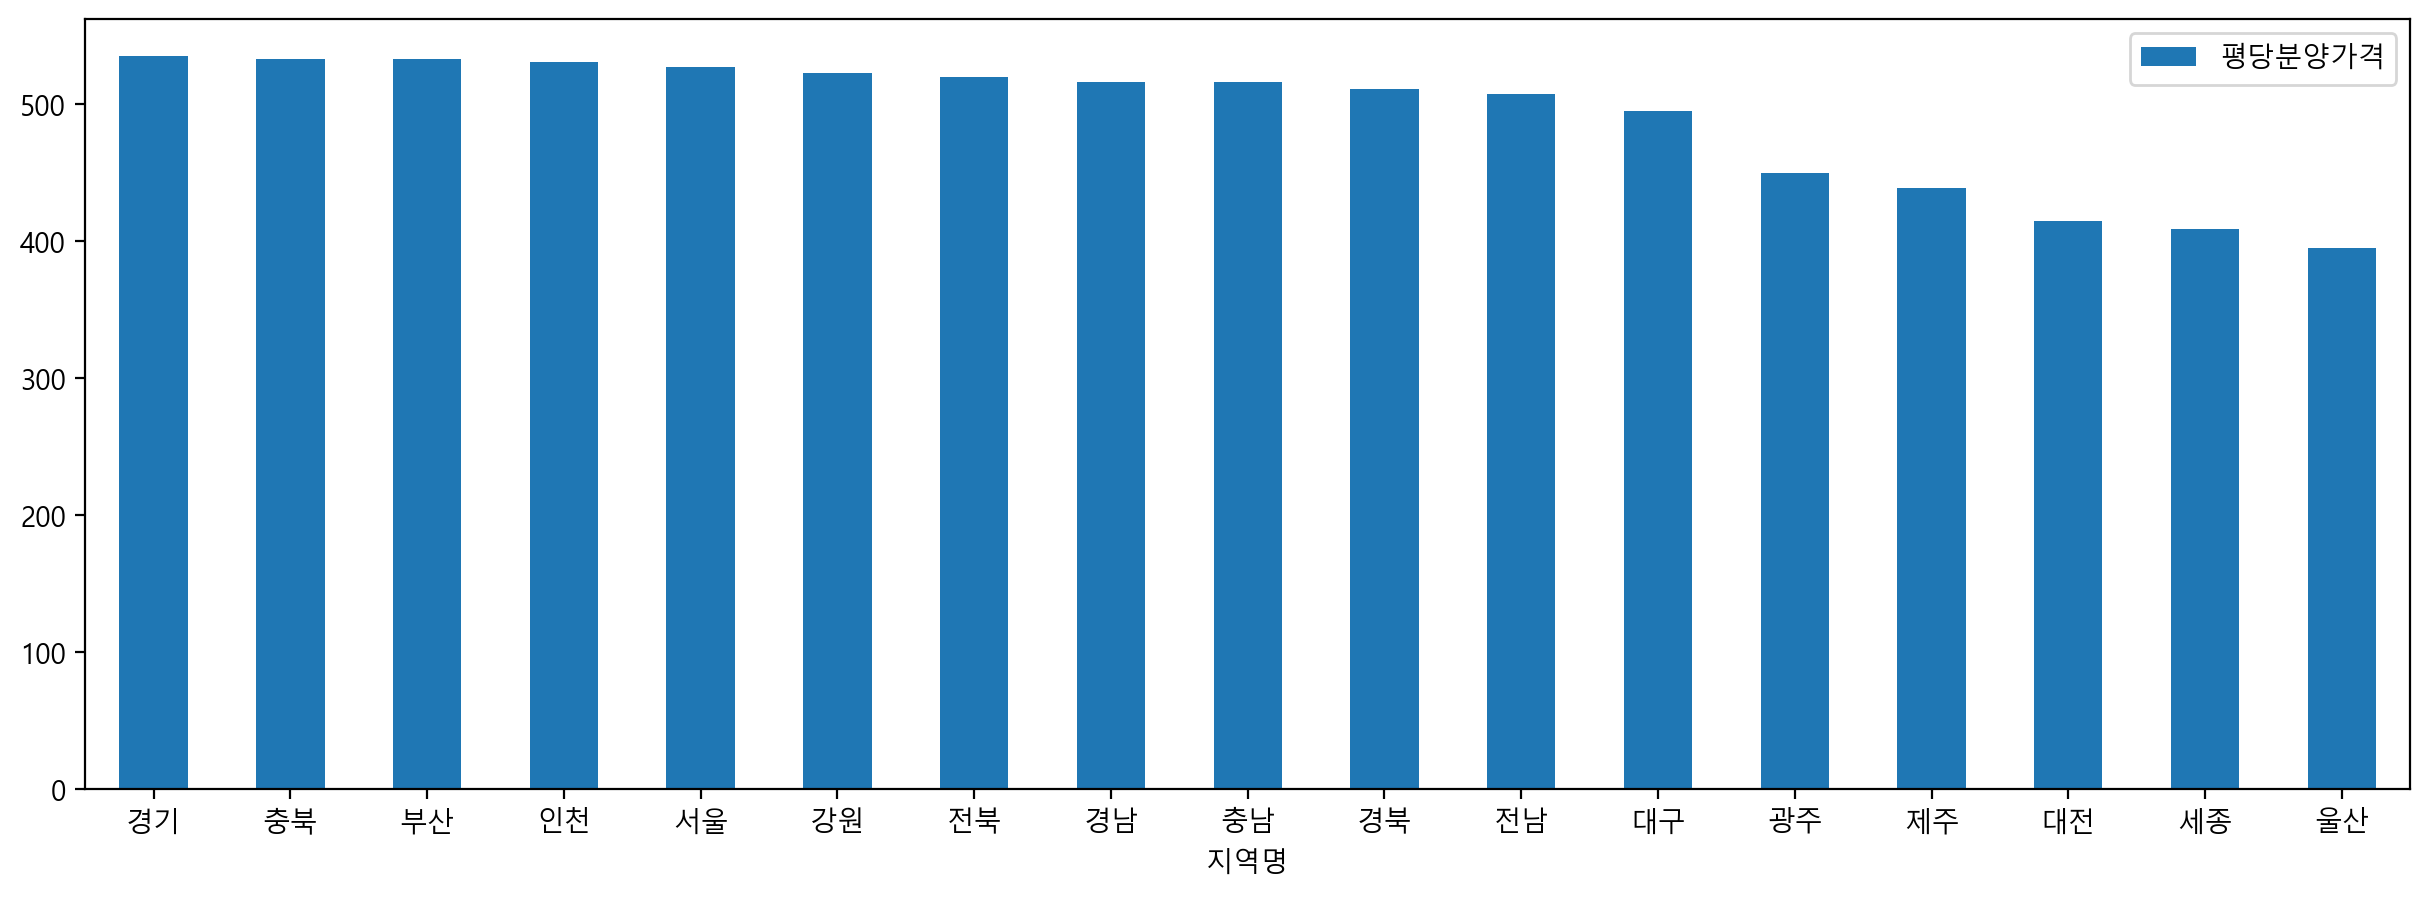

In [344]:
df_last_mat.plot.bar(figsize=(15,5),rot=0)  # bar 차트는 rotation을 지원한다
plt.show()

## (2) 지역별 평당분양가격 (line, bar)

<Axes: xlabel='지역명'>

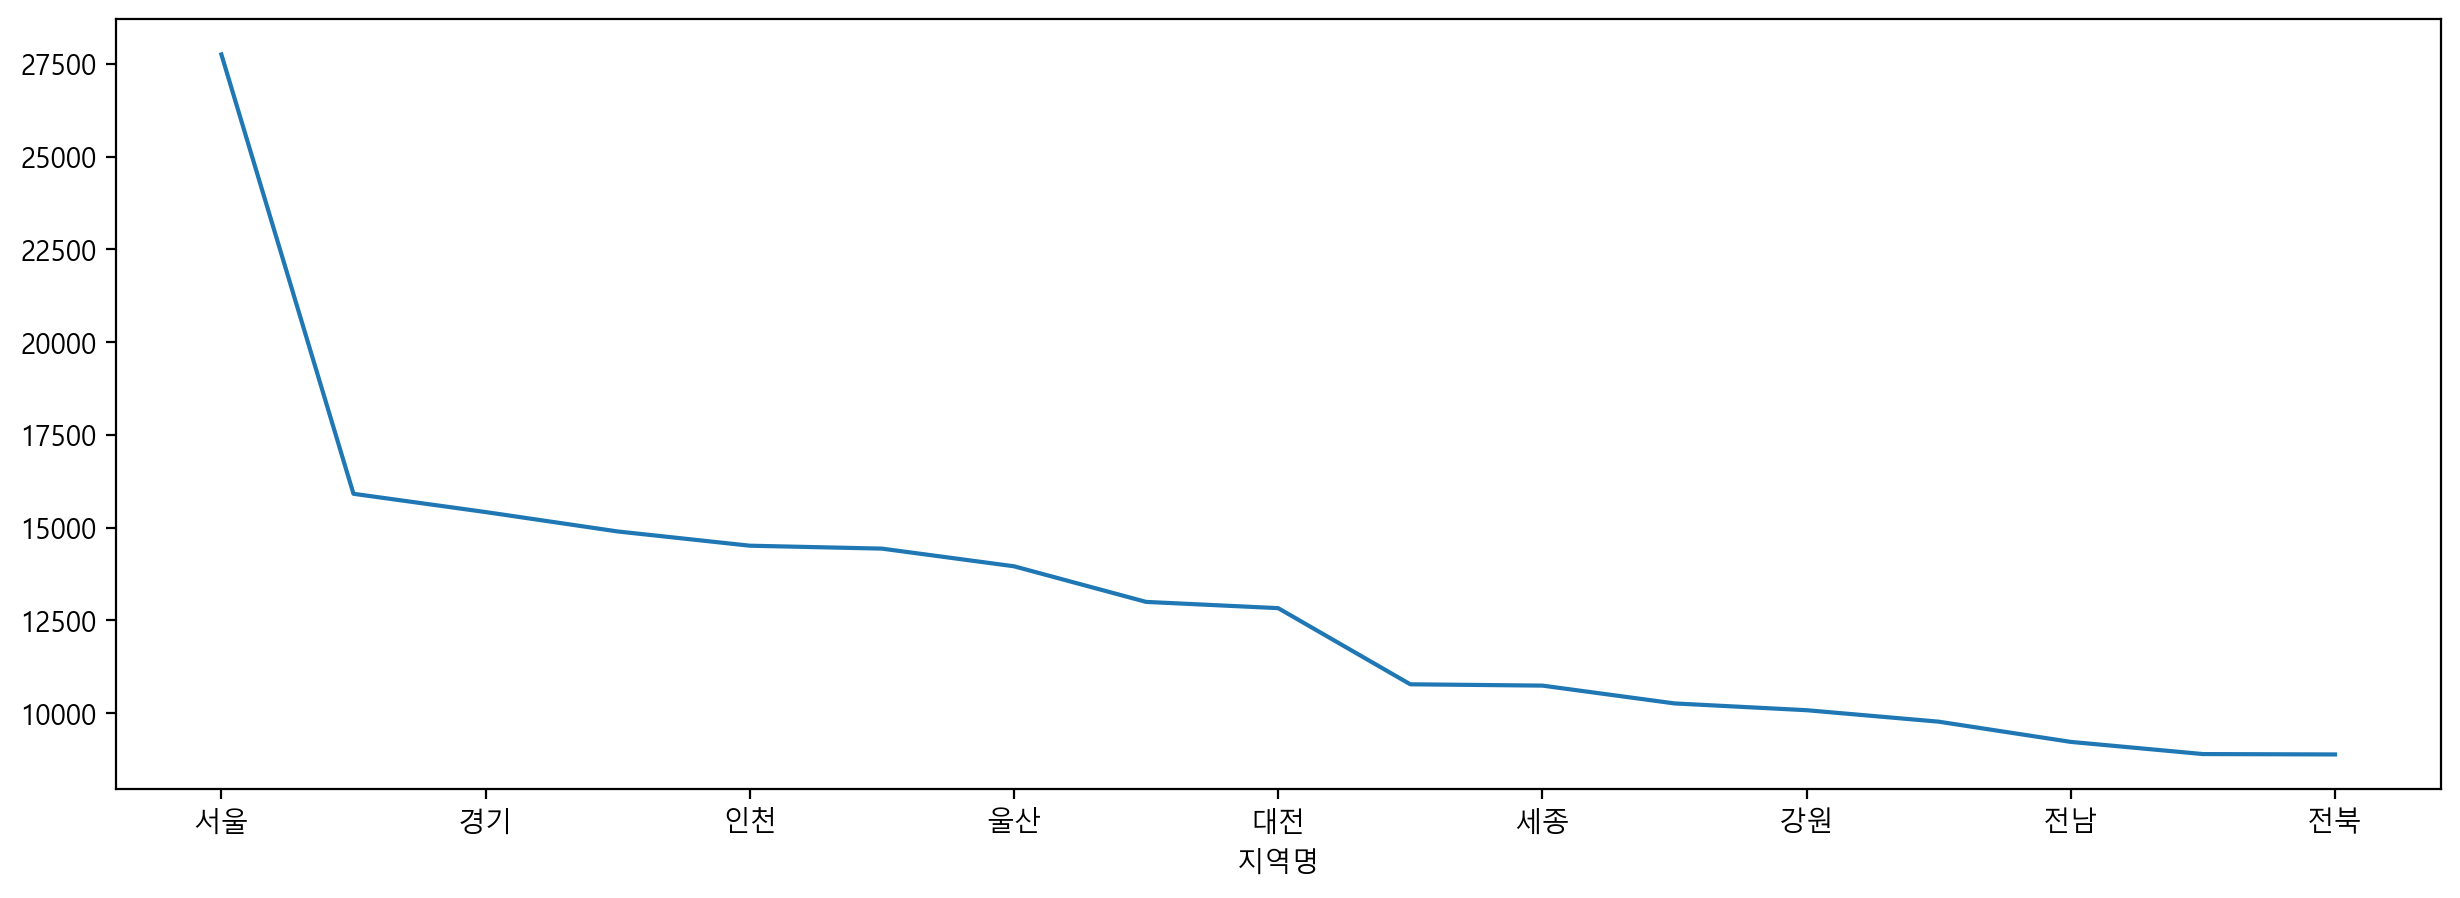

In [347]:
df_last.groupby('지역명')['평당분양가격'].mean().sort_values(ascending=False).plot(kind='line', figsize = (15,5))

<Axes: xlabel='지역명'>

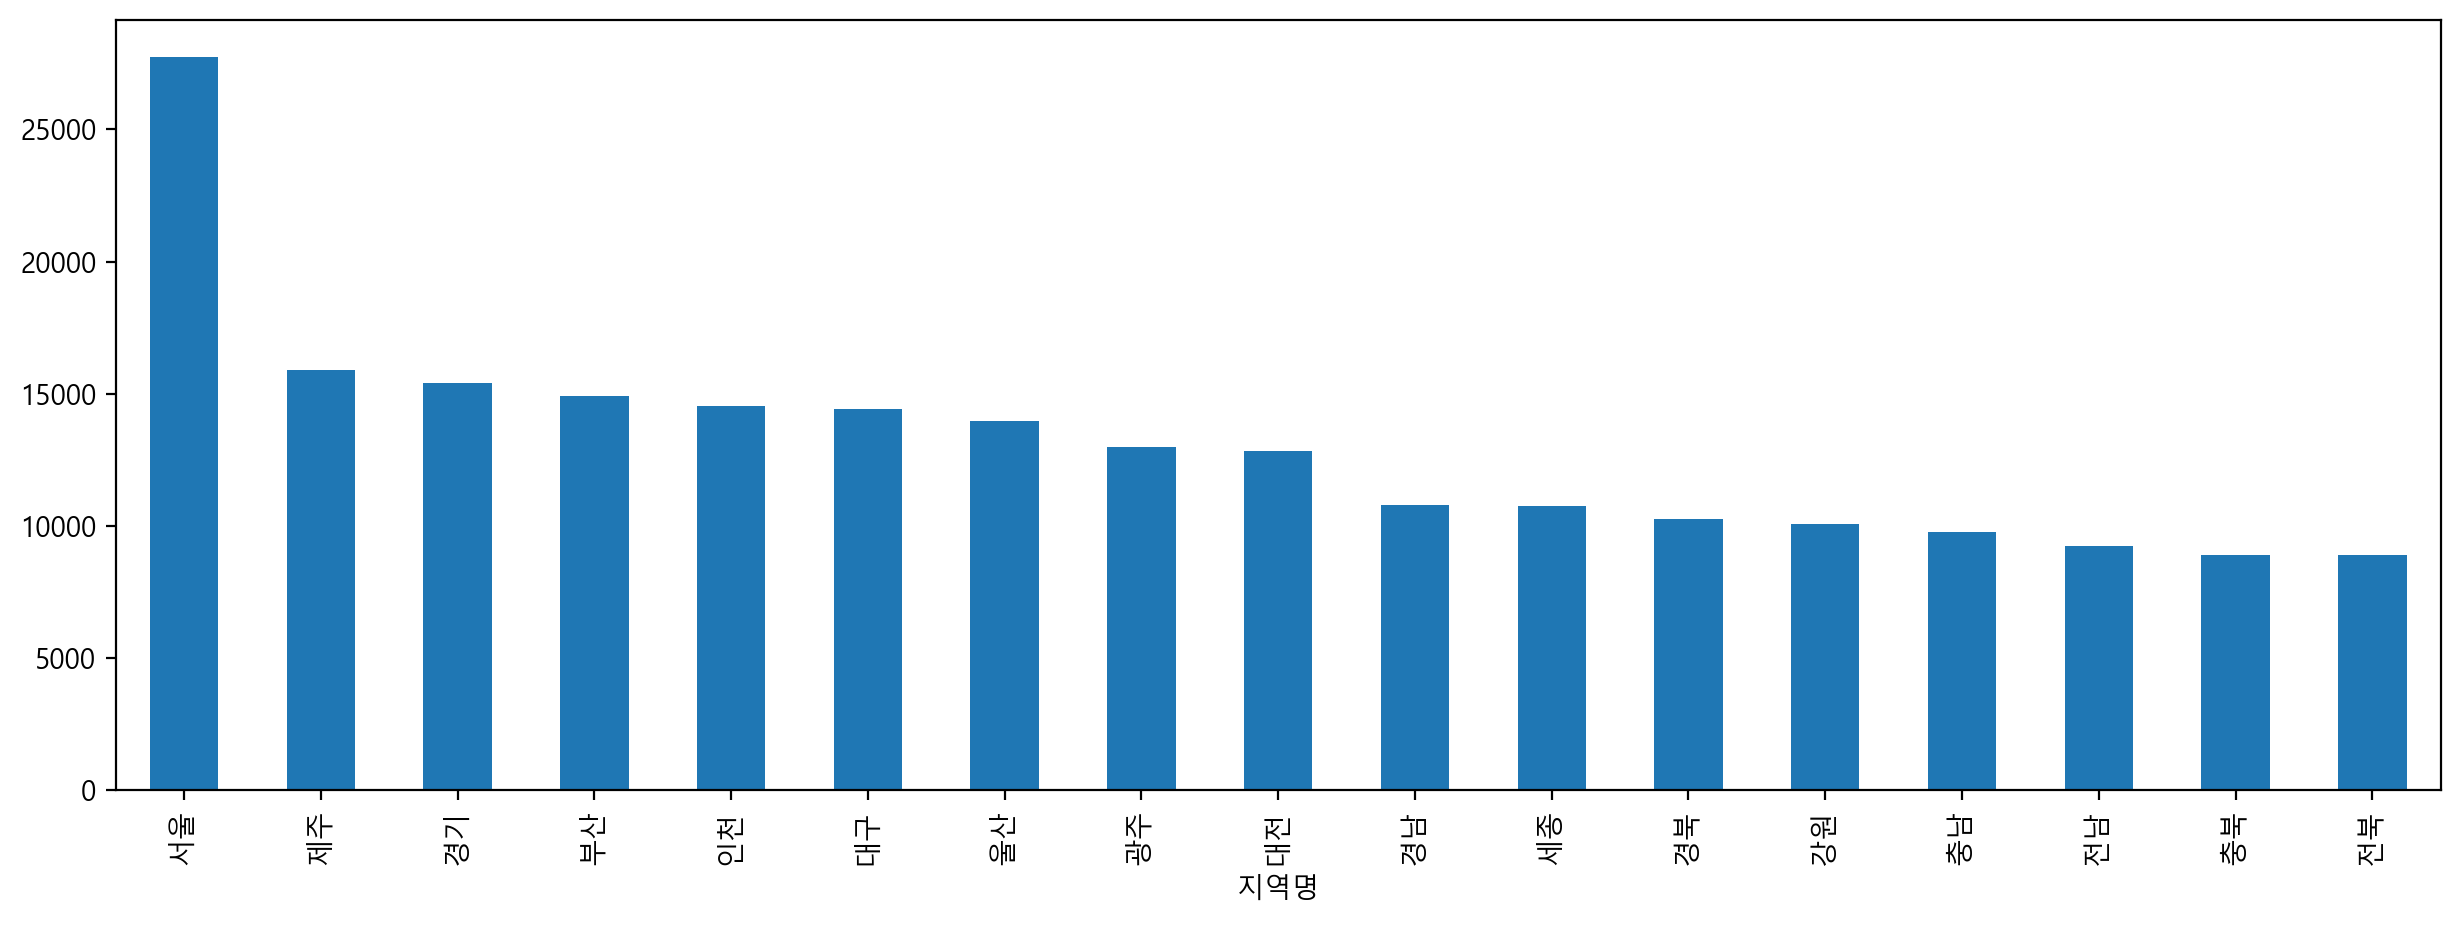

In [349]:
df_last.groupby('지역명')['평당분양가격'].mean().sort_values(ascending=False).plot(kind='bar', figsize = (15,5))

## (3) 전용면적별 평당분양가격(barplot)

In [359]:
result = df_last.groupby('전용면적')['평당분양가격'].mean().round().sort_values()
result

전용면적
60m²          12523.0
60m²~85m²     12619.0
모든면적          12654.0
85m²~102m²    13448.0
102m²~        14067.0
Name: 평당분양가격, dtype: float64

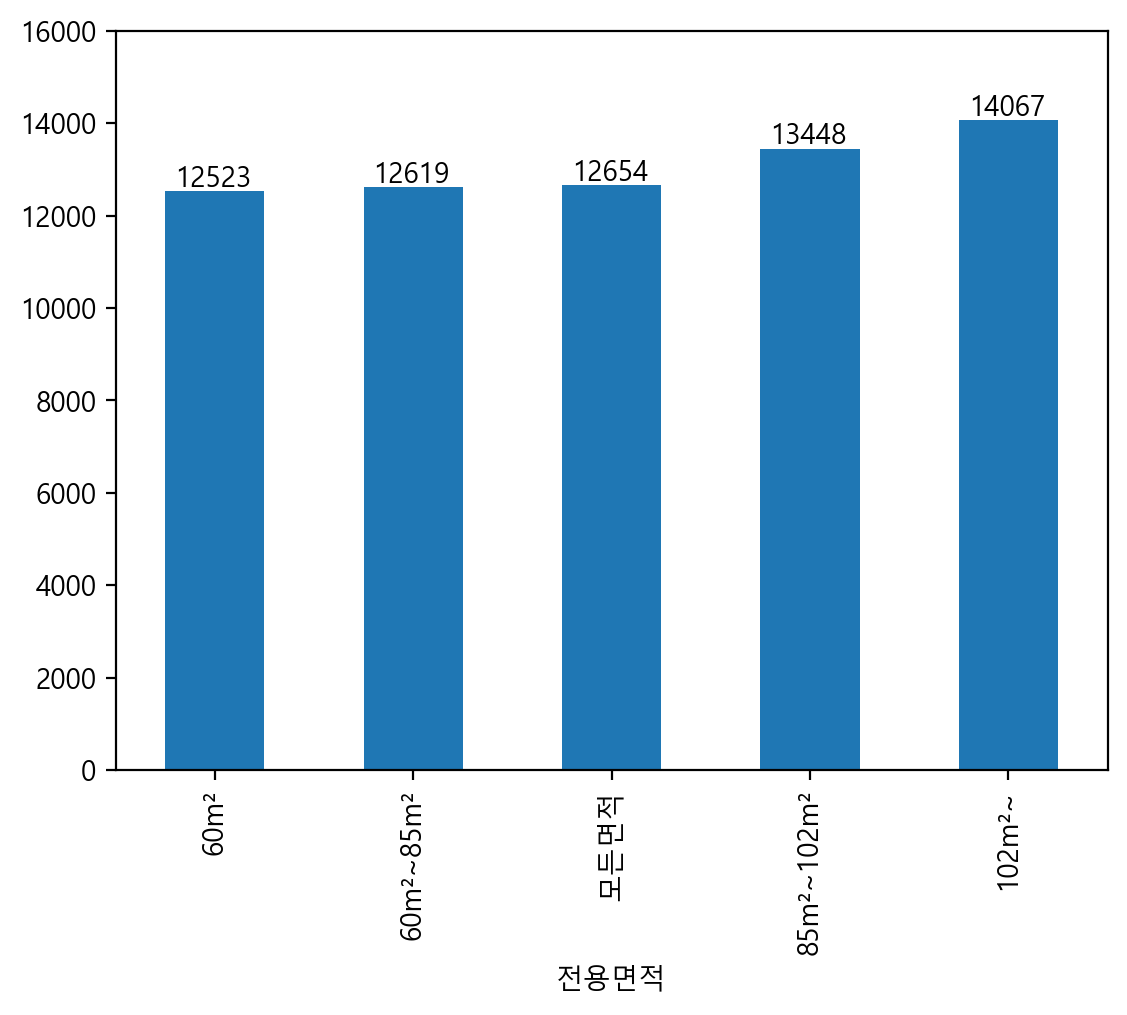

In [375]:
ax = result.plot.bar()
ax.set_ylim(0,16000)
# ax.text(-.2, 12600, '12523')
# ax.text(0.8, 12700, '12619')
# ax.text(1.8, 12750, '12654')
# ax.text(2.8, 13500, '13448')
# ax.text(3.8, 14100, '14067')
# 길다 for문 돌리자
for i, j in enumerate(result):
    ax.text(i-0.2, j+100, round(j))

## (4) 연도별 평균 평당분양가격(line)

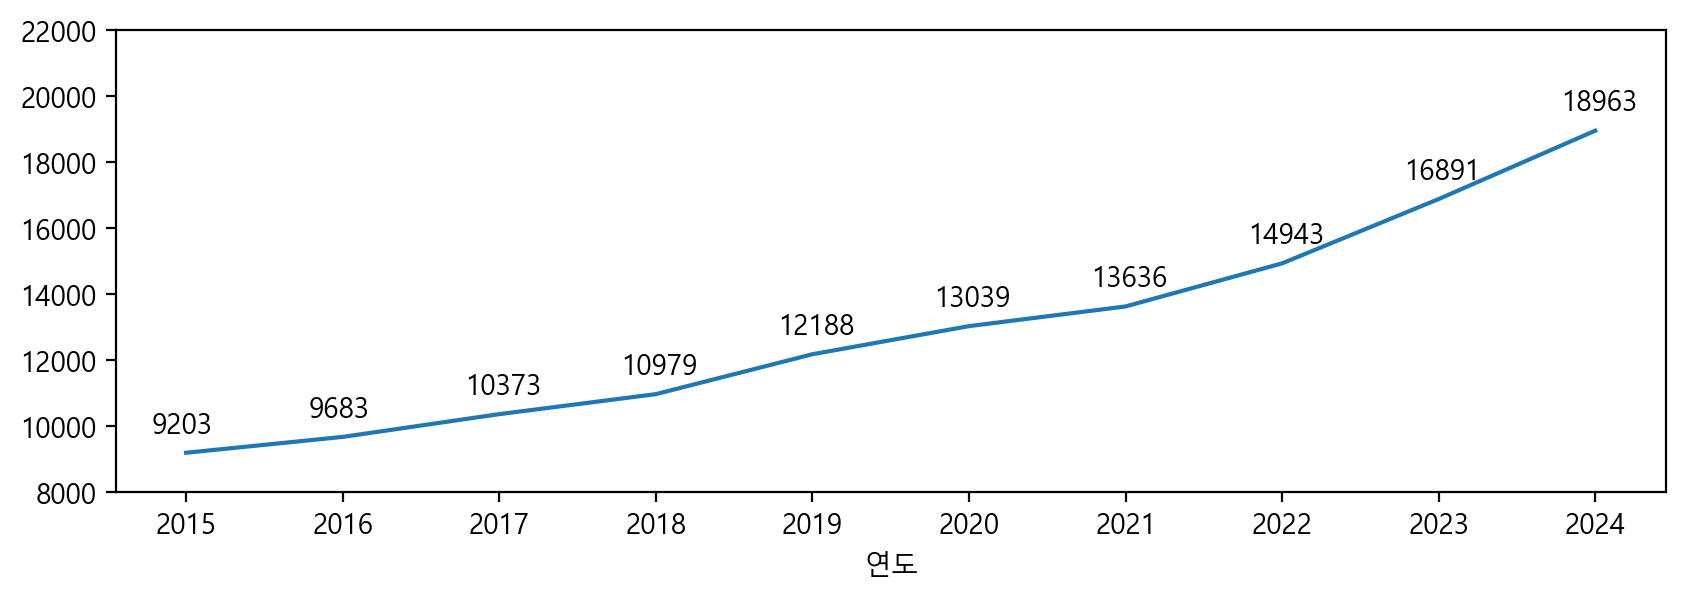

In [396]:
result = df_last.groupby('연도')['평당분양가격'].mean()
ax = result.plot.line(figsize=(10,3))
ax.set_xticks(result.index)
ax.set_ylim([8000, 22000])
for year, val in zip(result.index, result):
    ax.text(year-0.22, val+600, round(val))
plt.show()

(0.0, 20000.0)

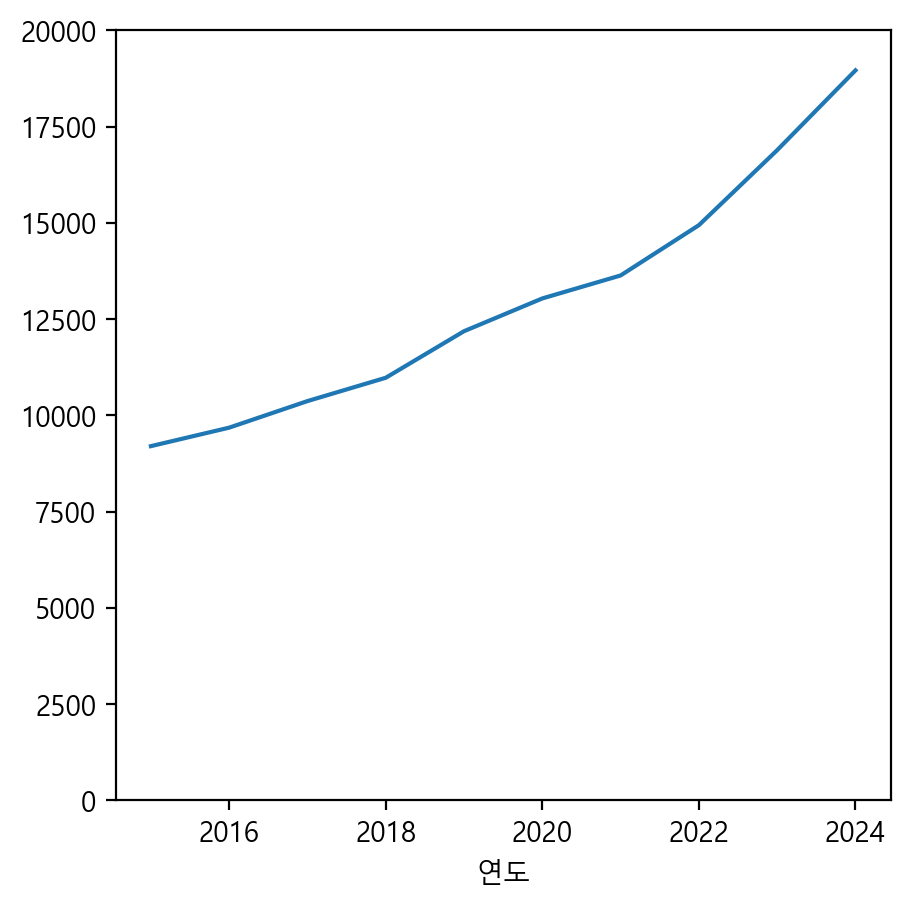

In [398]:
result.plot.line(figsize=(5,5))
plt.ylim([0,20000])

범례:https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

# 9. seaborn으로 시각화
- 위에서 시각화한 내용을 seaborn으로 시각화

In [401]:
sns.set(style='white', rc={'figure.figsize':(9,3)})
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

## (1) 지역별 평당분양가격

<Axes: xlabel='지역명', ylabel='평당분양가격'>

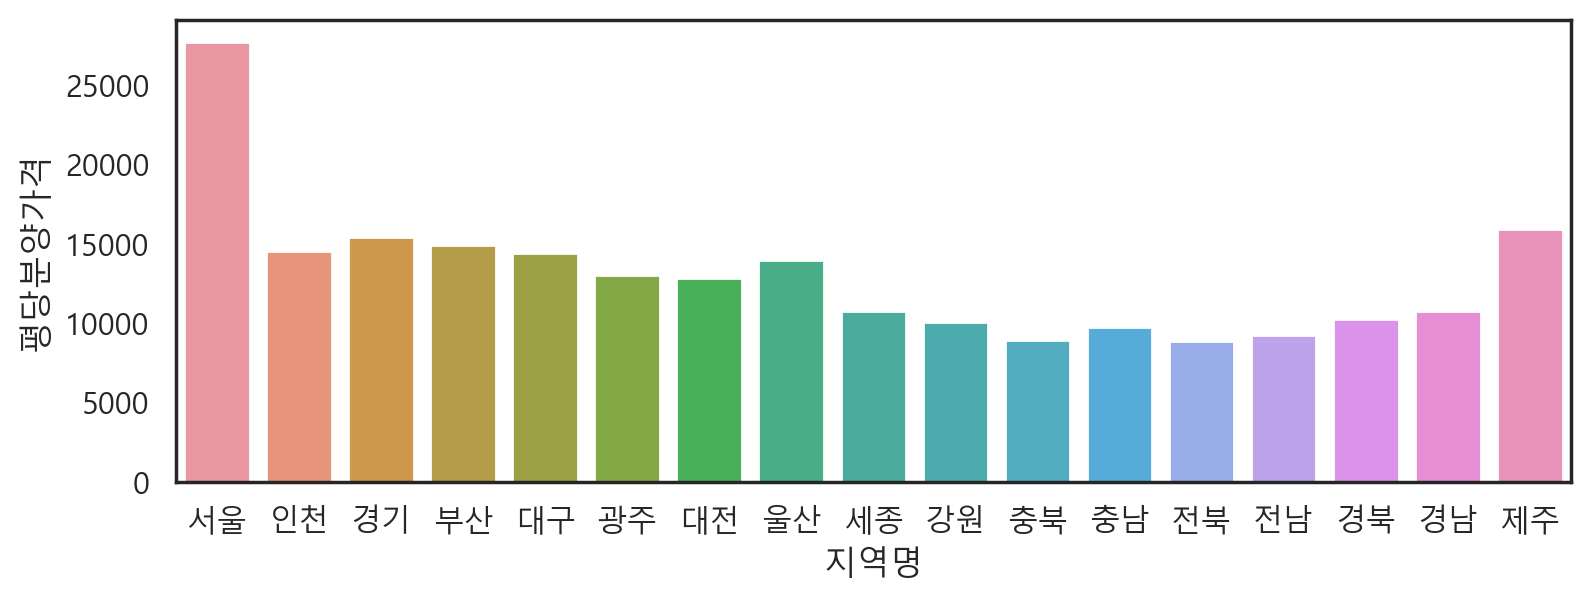

In [406]:
sns.barplot(data = df_last, x='지역명', y = '평당분양가격',
#           errorbar='sd', # 표준편차, 기본값은 95% 신뢰구간
            errorbar=None
           )

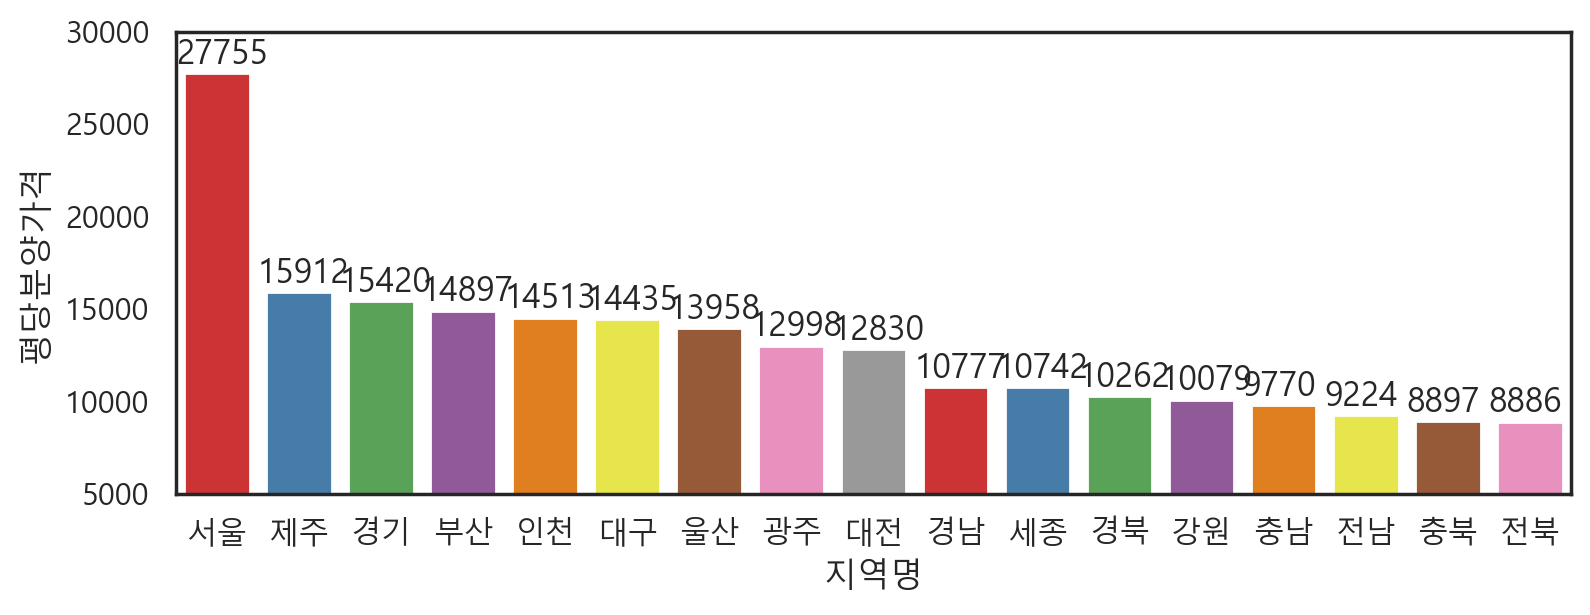

In [416]:
# sort, 값 텍스트 삽입을 하고 싶다면, 위의 설정만으로는 안됨
result = df_last.groupby('지역명')['평당분양가격'].mean().sort_values(ascending=False)
ax = sns.barplot(data=df_last, x='지역명', y='평당분양가격',
           order=result.index,
           errorbar=None,
           palette = 'Set1')
ax.set_ylim([5000,30000])
for idx, val in enumerate(result):
    ax.text(idx-0.5,val+500, round(val))

plt.show()

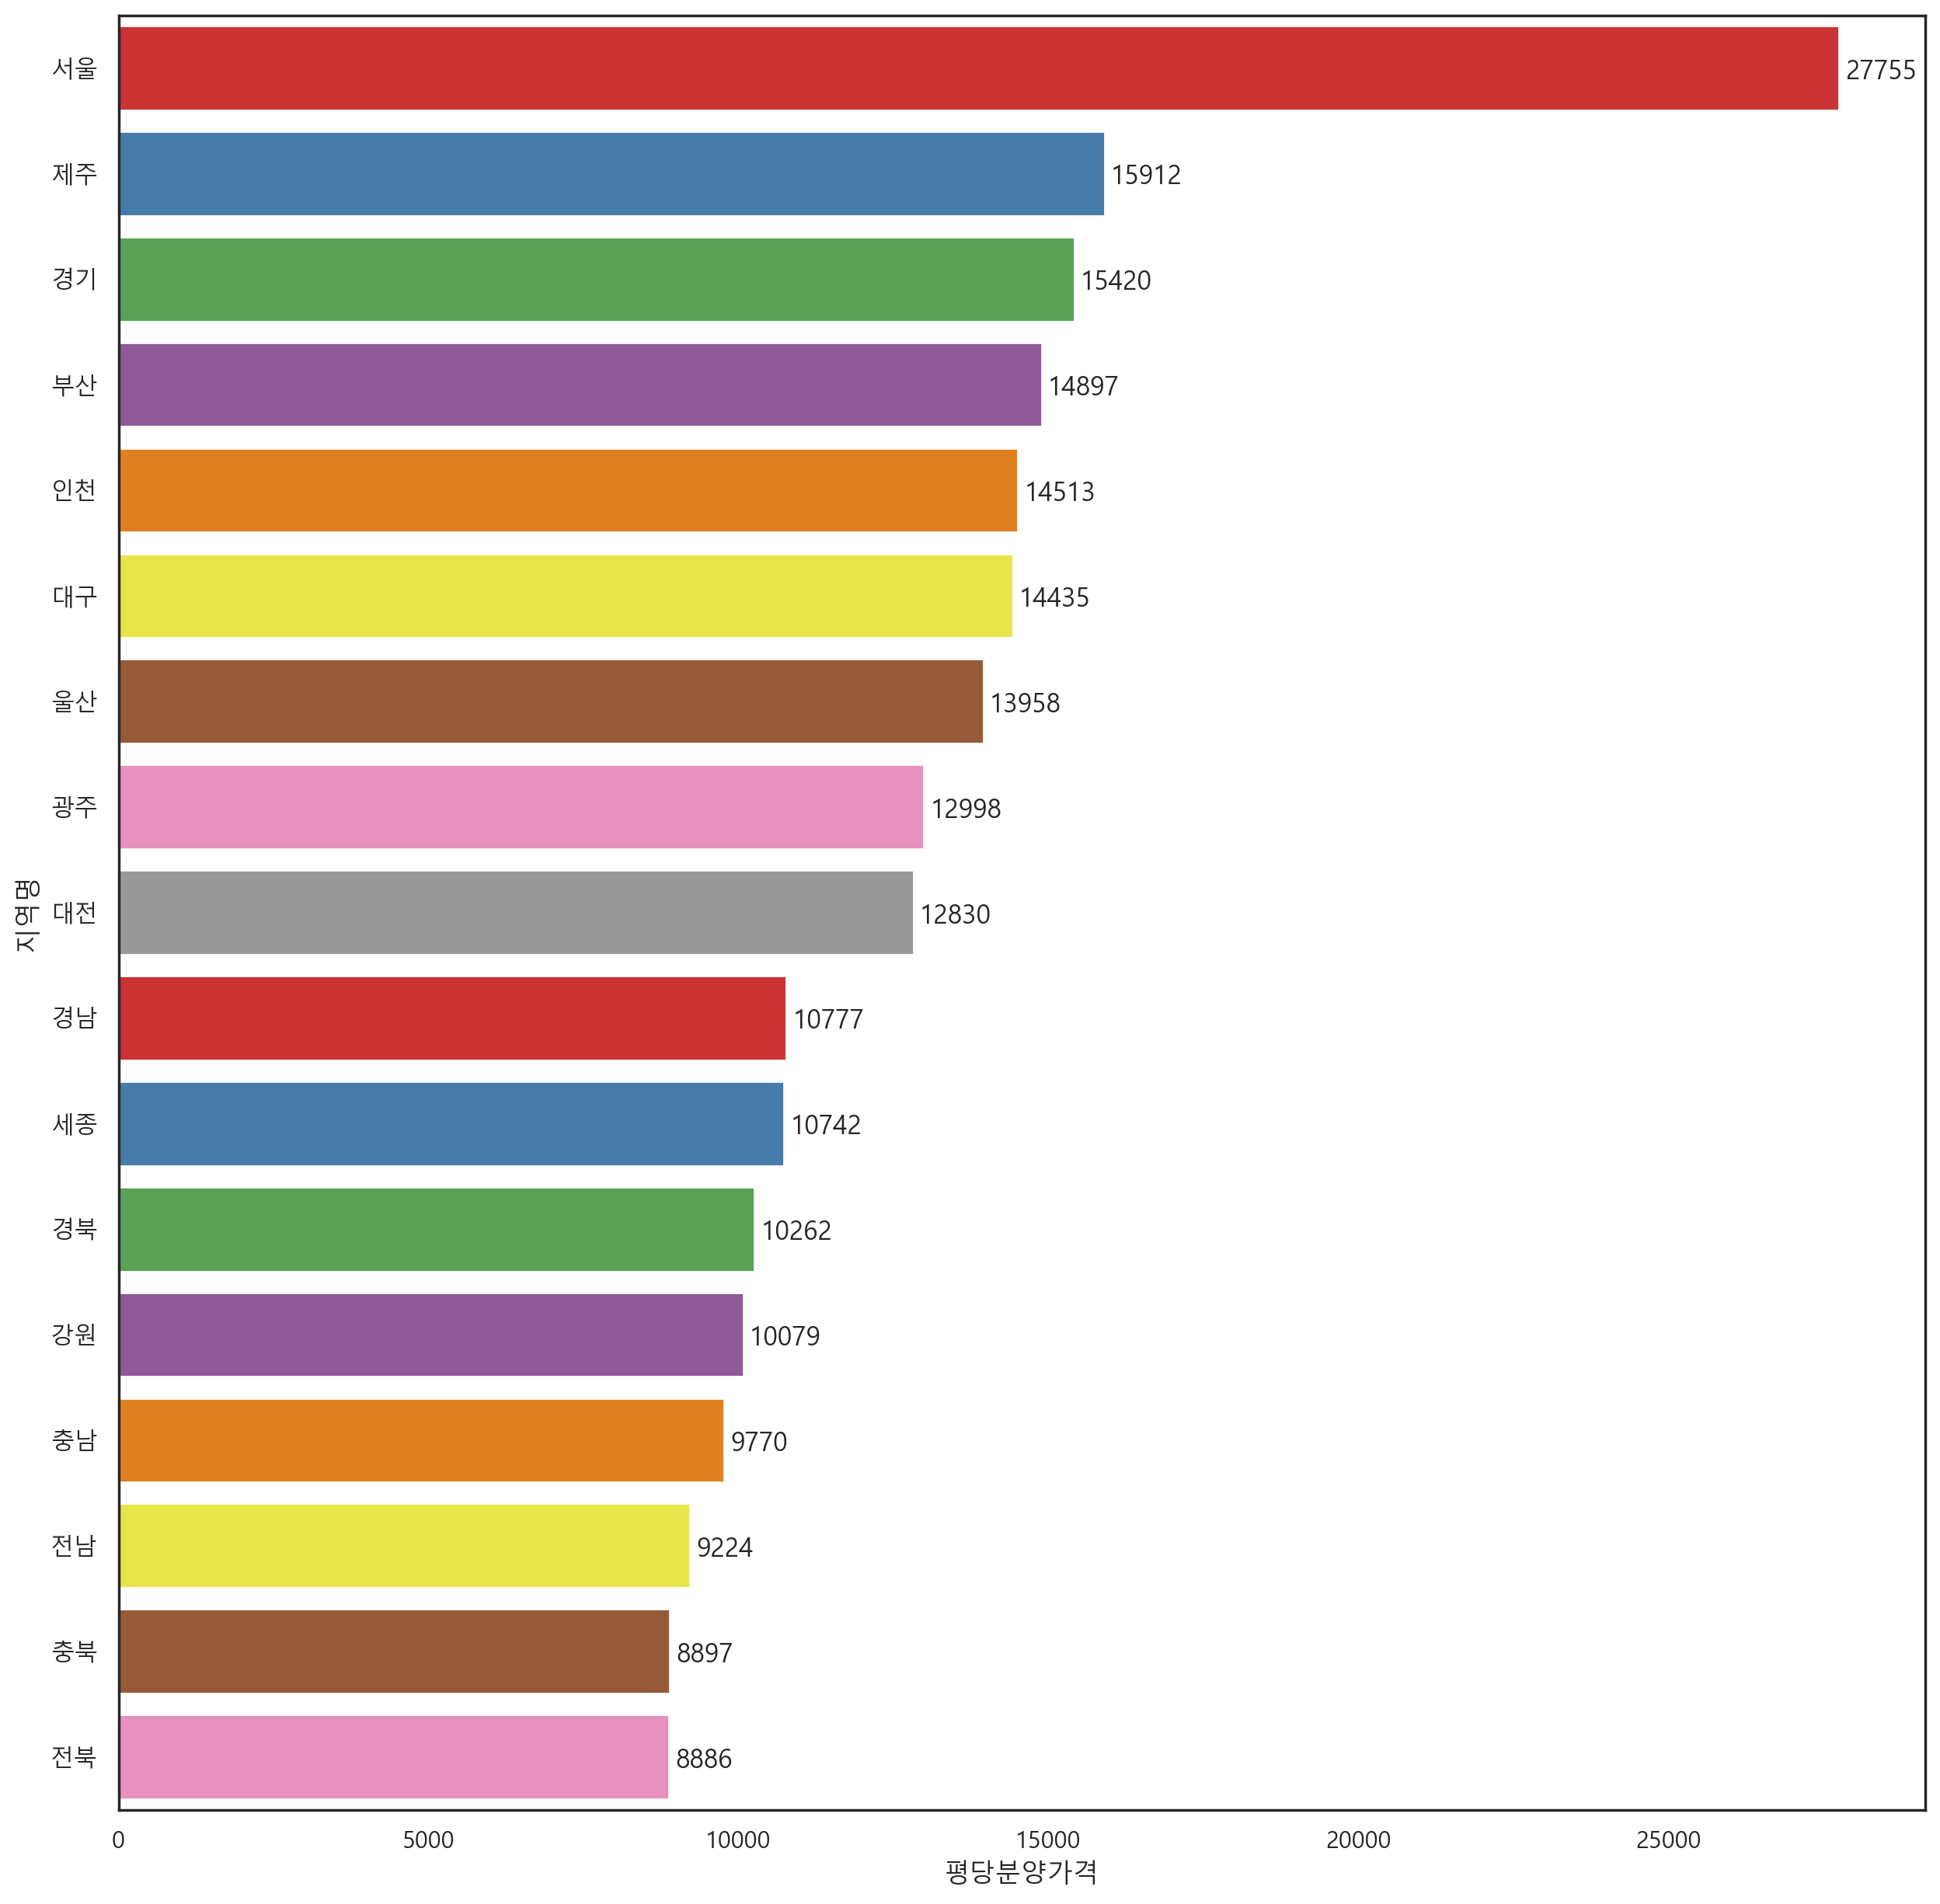

In [427]:
# 가로 바 그래프로 변경
plt.figure(figsize=(15,15))
sns.barplot(data=df_last, x='평당분양가격', y='지역명',
           order=result.index,
           errorbar=None,
           palette = 'Set1')
for idx, val in enumerate(result):
    plt.text(val+100, idx+0.1, round(val))
plt.show()

## (2) 연도별 평당분양가격

<Axes: xlabel='연도', ylabel='평당분양가격'>

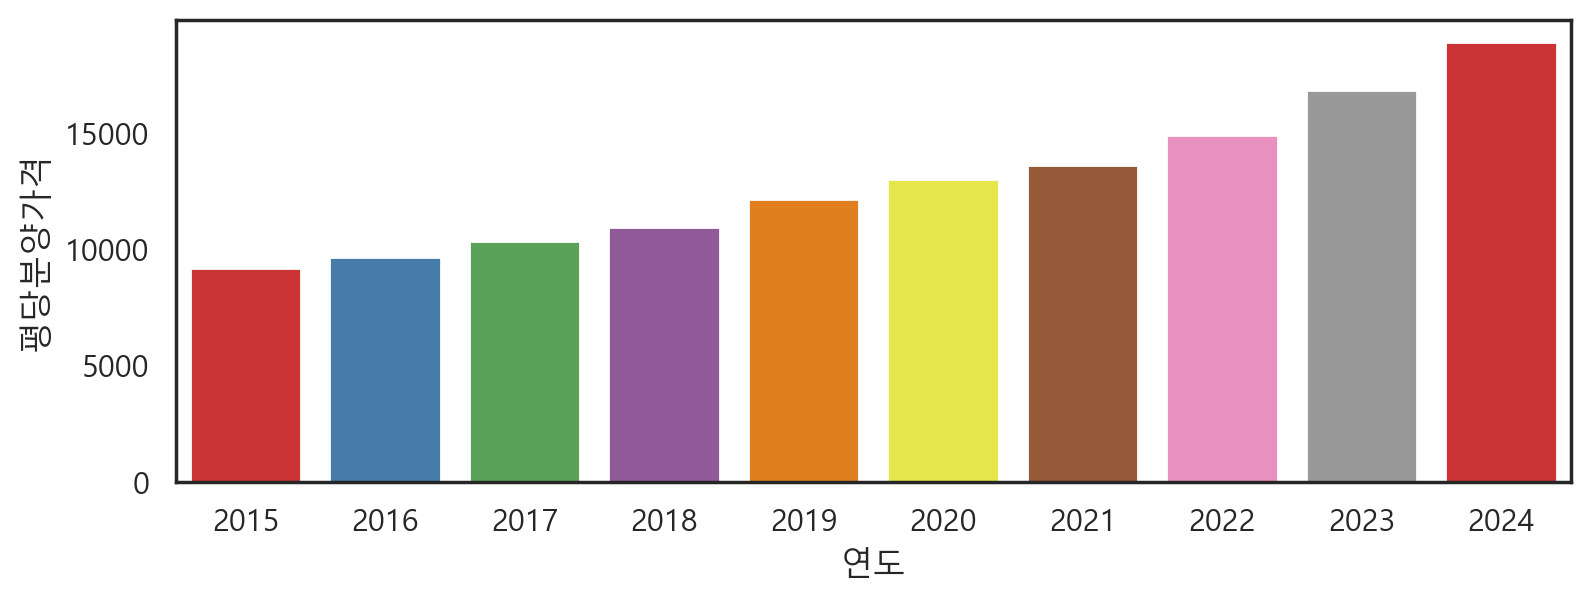

In [429]:
result = df_last.groupby('연도')['평당분양가격'].mean()
sns.barplot(data=df_last, x='연도', y='평당분양가격',
           errorbar=None,
           palette = 'Set1')

## (3) 그 외 lineplot, relplot, boxplot, violinplot, boxexplot, regplot, swarmplot

<Axes: xlabel='연도', ylabel='평당분양가격'>

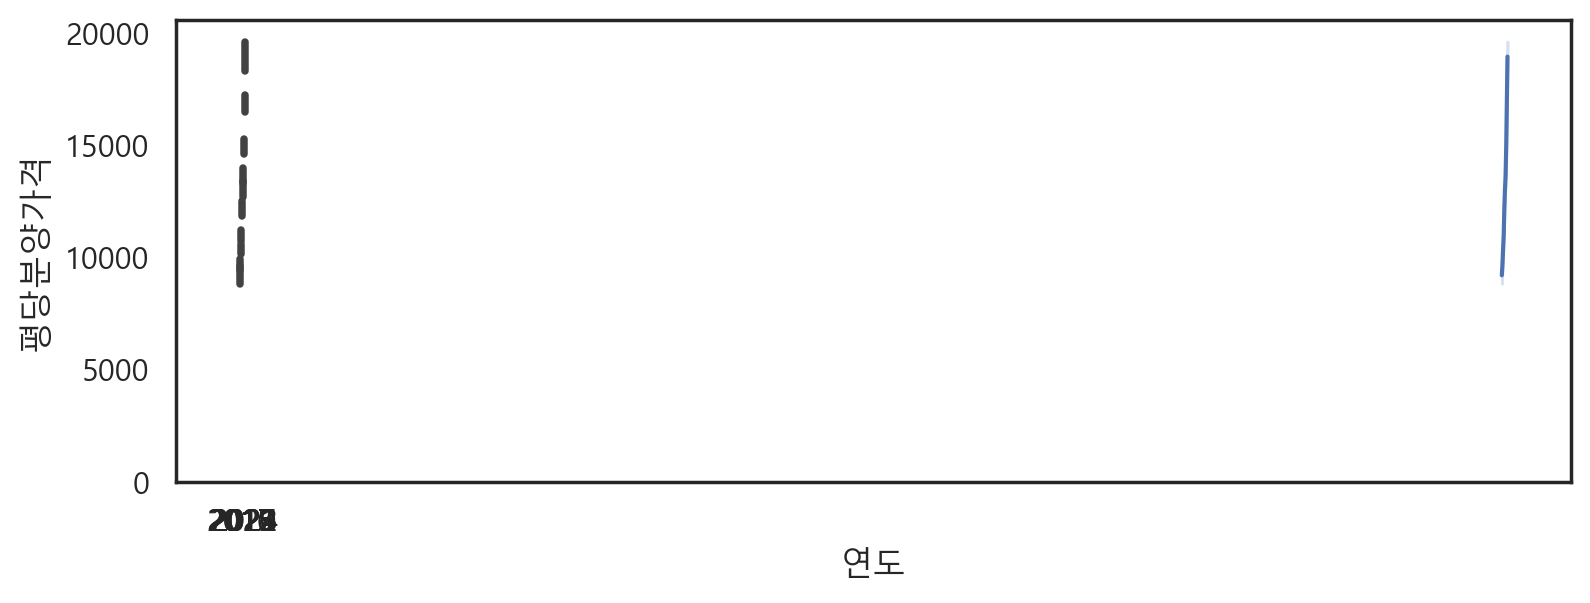

In [444]:
# lineplot

sns.barplot(df_last, x='연도', y='평당분양가격')
sns.lineplot(df_last, x='연도', y='평당분양가격')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:456: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


<Figure size 1500x400 with 0 Axes>

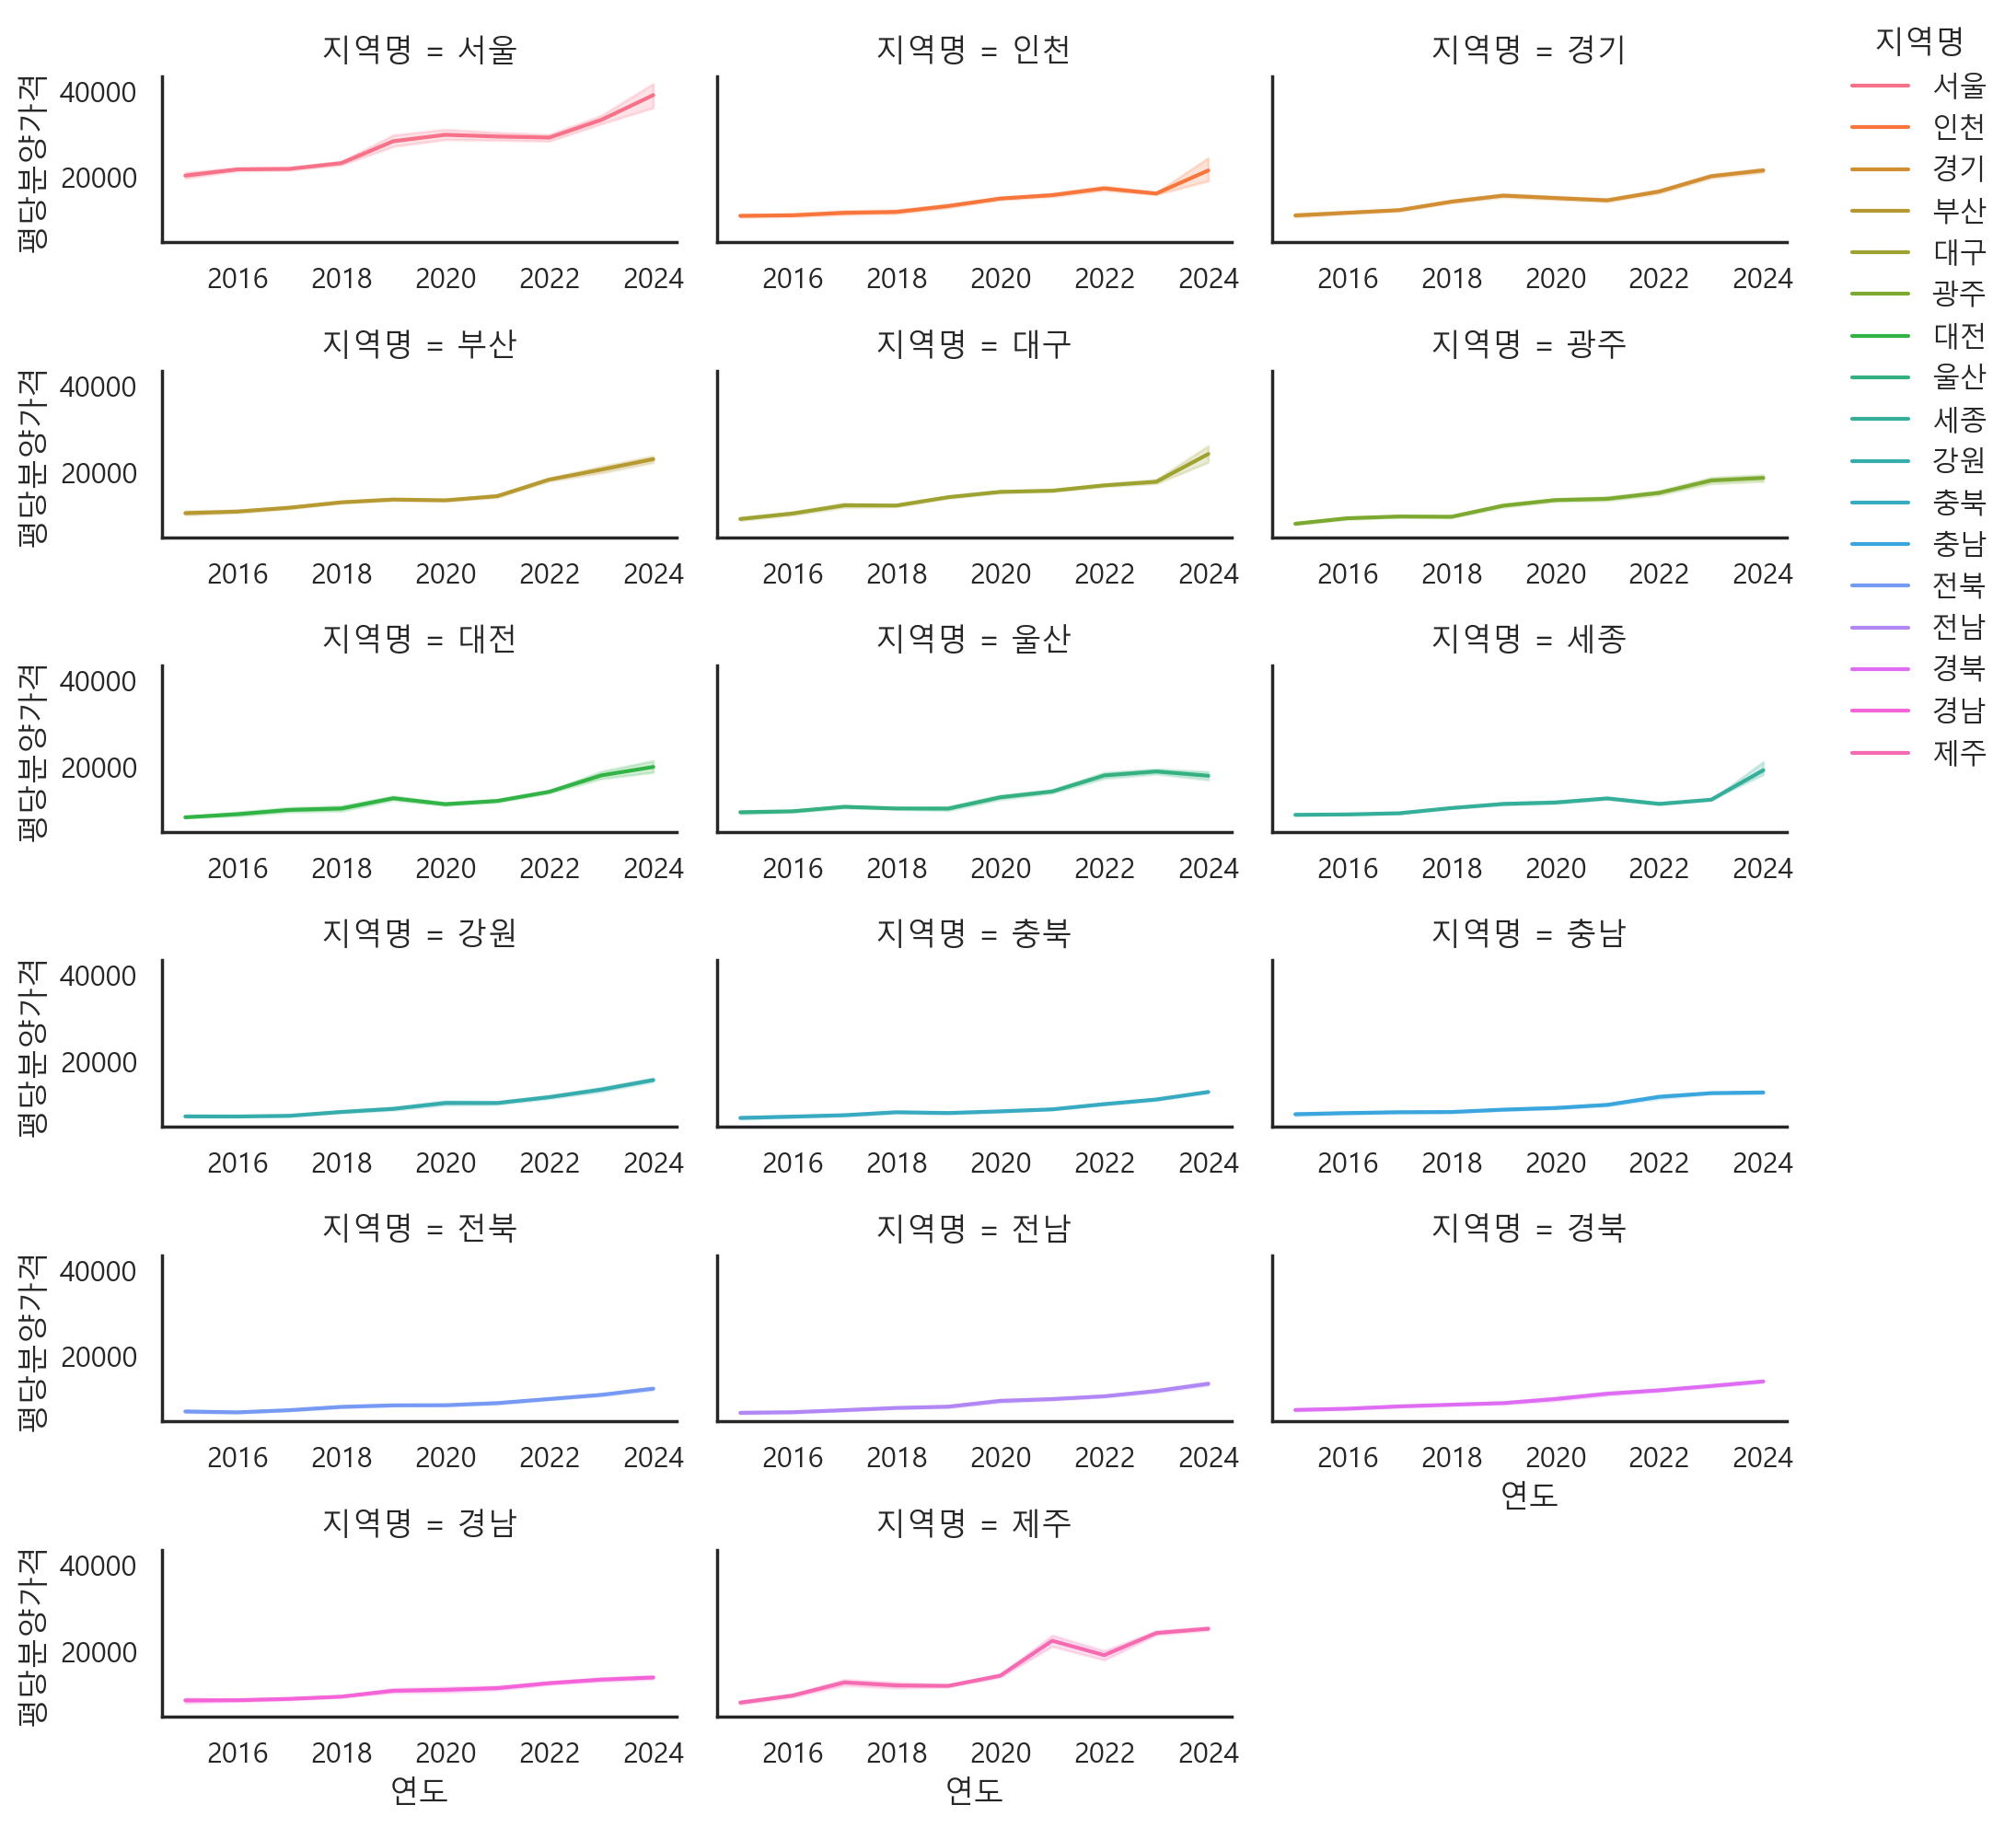

In [441]:
# relplot
plt.figure(figsize=(15,4))
ax = sns.relplot(df_last, x='연도', y='평당분양가격',
            hue='지역명', col='지역명', col_wrap=3,
            kind = 'line',
            facet_kws={'sharex': False, 'sharey':True}
            )
ax.fig.set_size_inches(10,10) # 서브 플롯 사이즈 조정
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()  # 서브플롯 레이아웃 타이트하게 조정
plt.show()

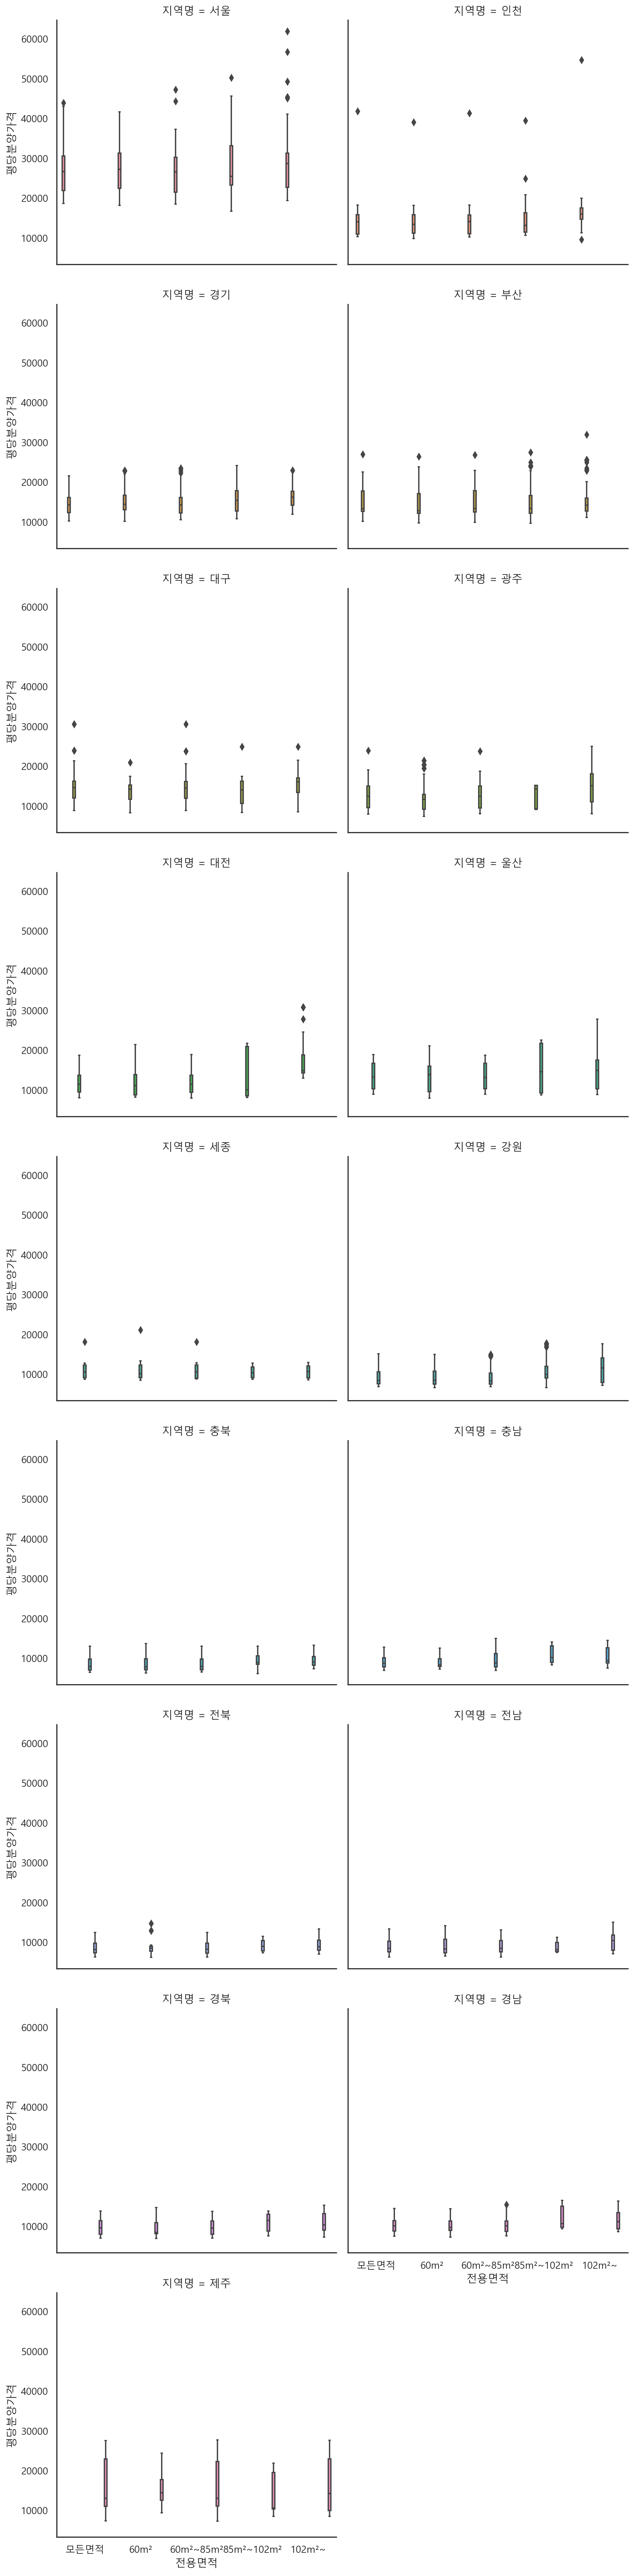

In [451]:
# catplot
ax = sns.catplot(df_last, x='전용면적', y='평당분양가격',
            hue='지역명', col='지역명', col_wrap=2,
            kind = 'box',
#            facet_kws={'sharex': False, 'sharey':True}
            )
ax.fig.set_size_inches(10,40) # 서브 플롯 사이즈 조정
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.tight_layout()  # 서브플롯 레이아웃 타이트하게 조정
plt.show()

<Axes: xlabel='연도', ylabel='평당분양가격'>

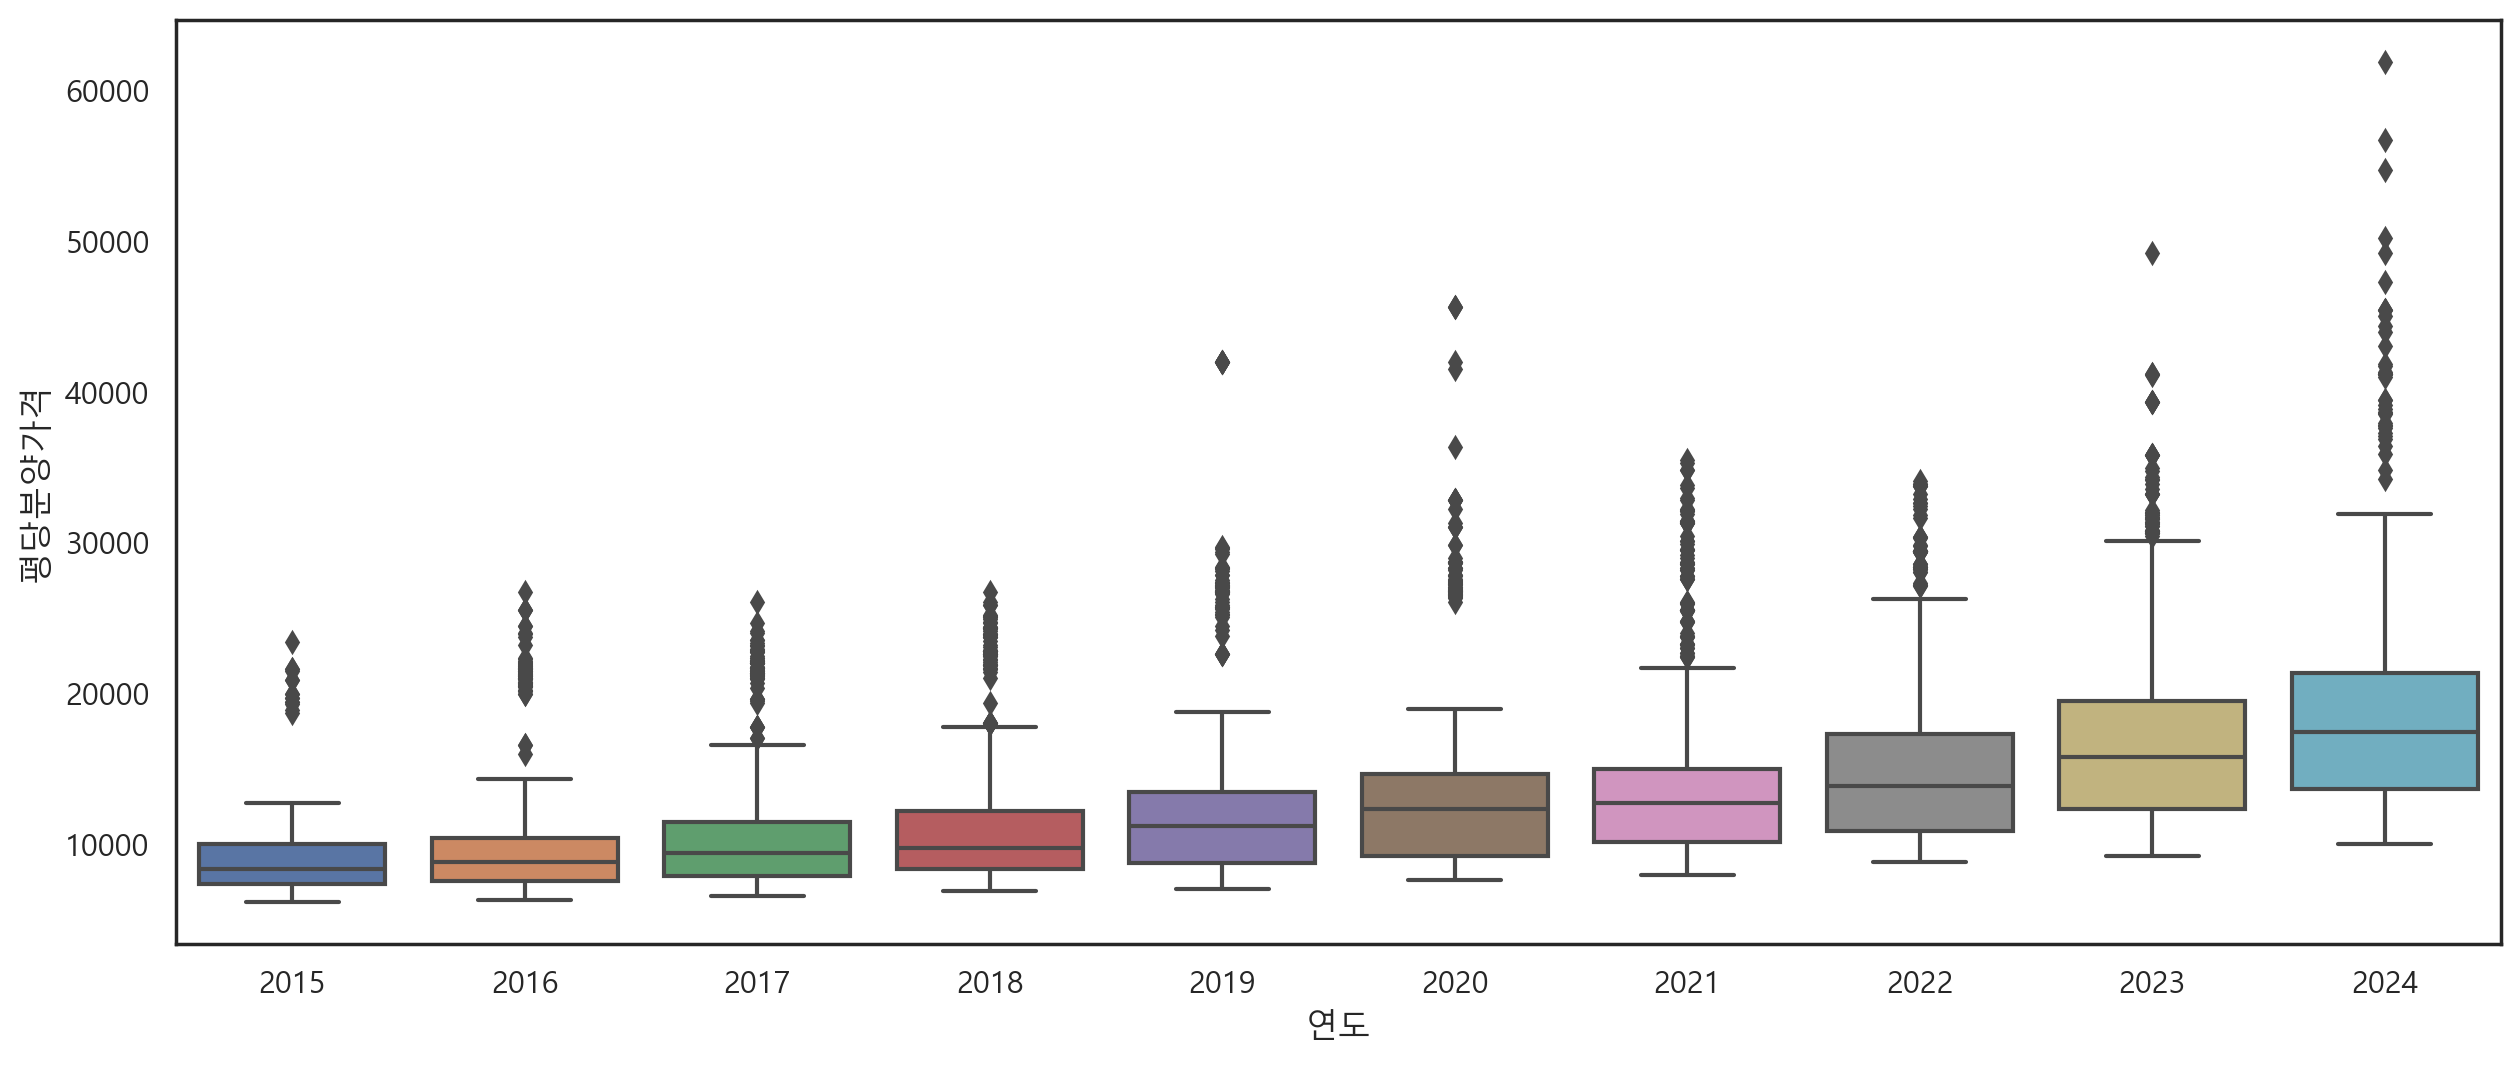

In [453]:
# boxplot
plt.figure(figsize=(15,6))
sns.boxplot(df_last, x='연도', y='평당분양가격')

<Axes: xlabel='연도', ylabel='평당분양가격'>

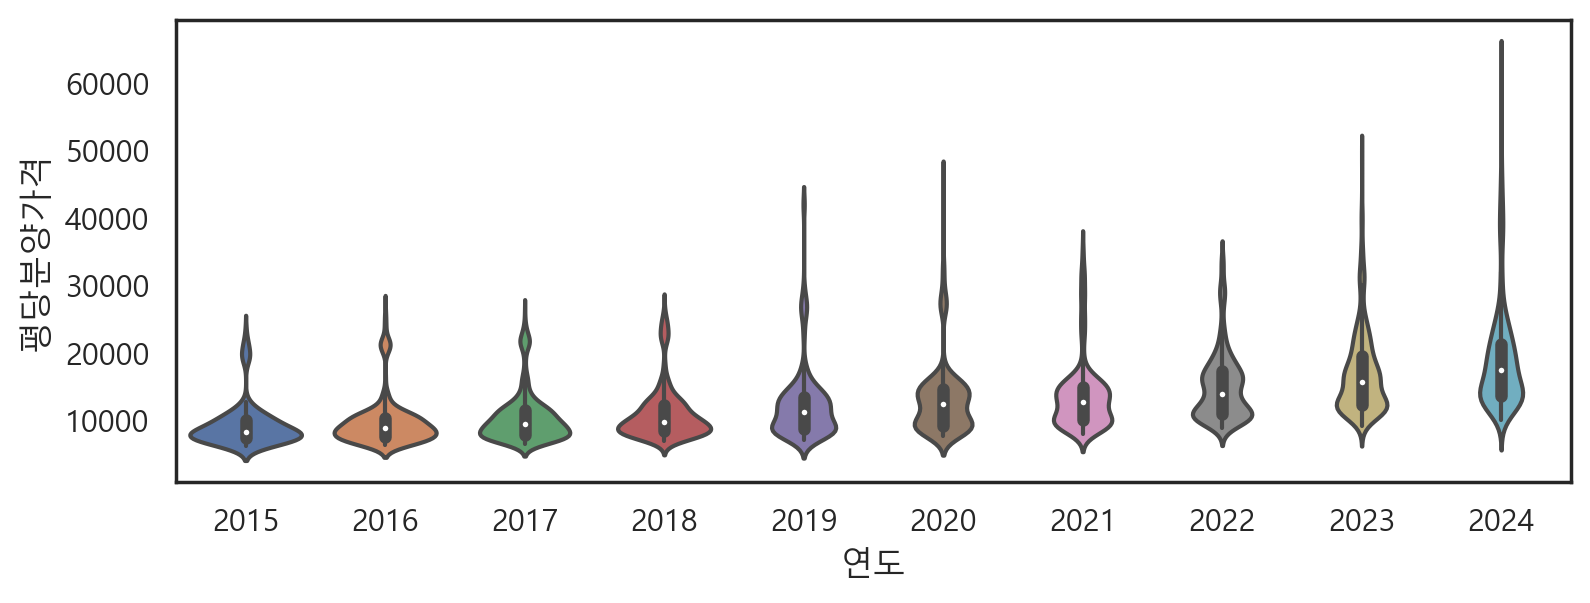

In [456]:
# violinplot
sns.violinplot(df_last, x='연도', y='평당분양가격')

<Axes: xlabel='연도', ylabel='평당분양가격'>

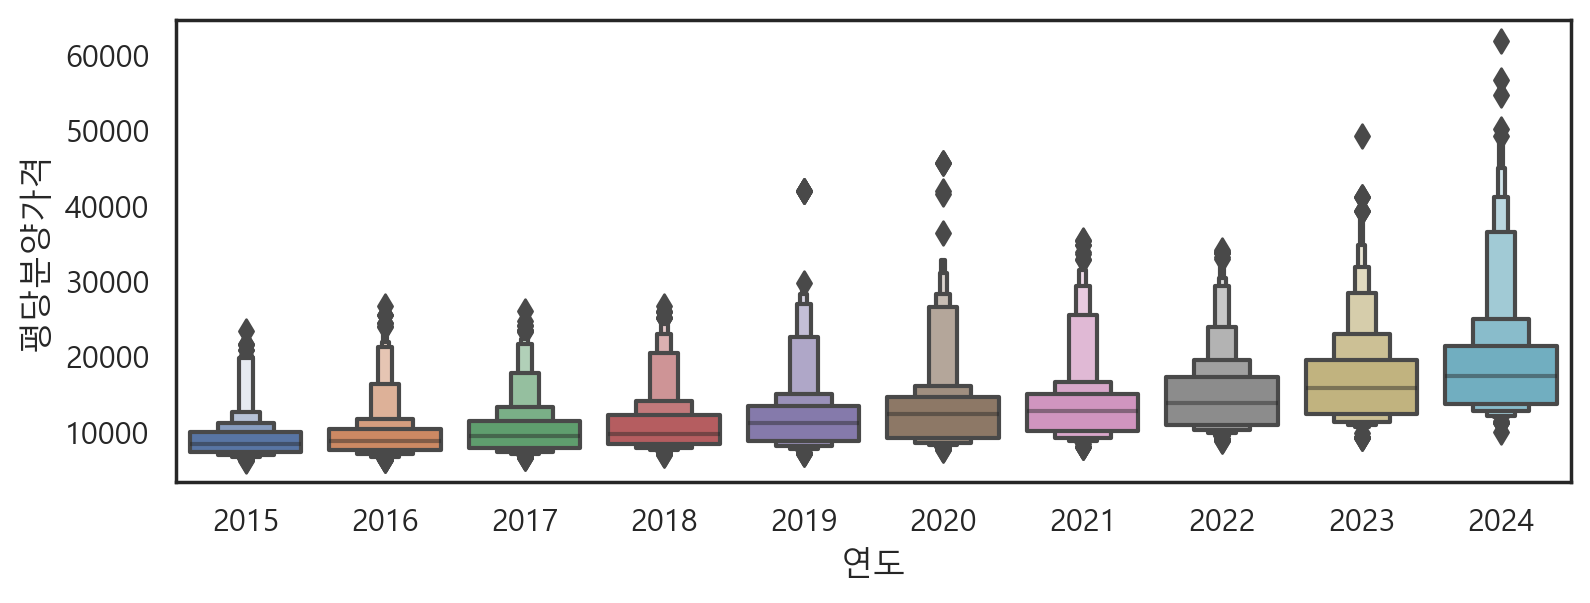

In [457]:
# boxenplot
sns.boxenplot(df_last, x='연도', y='평당분양가격')

<Axes: xlabel='연도', ylabel='평당분양가격'>

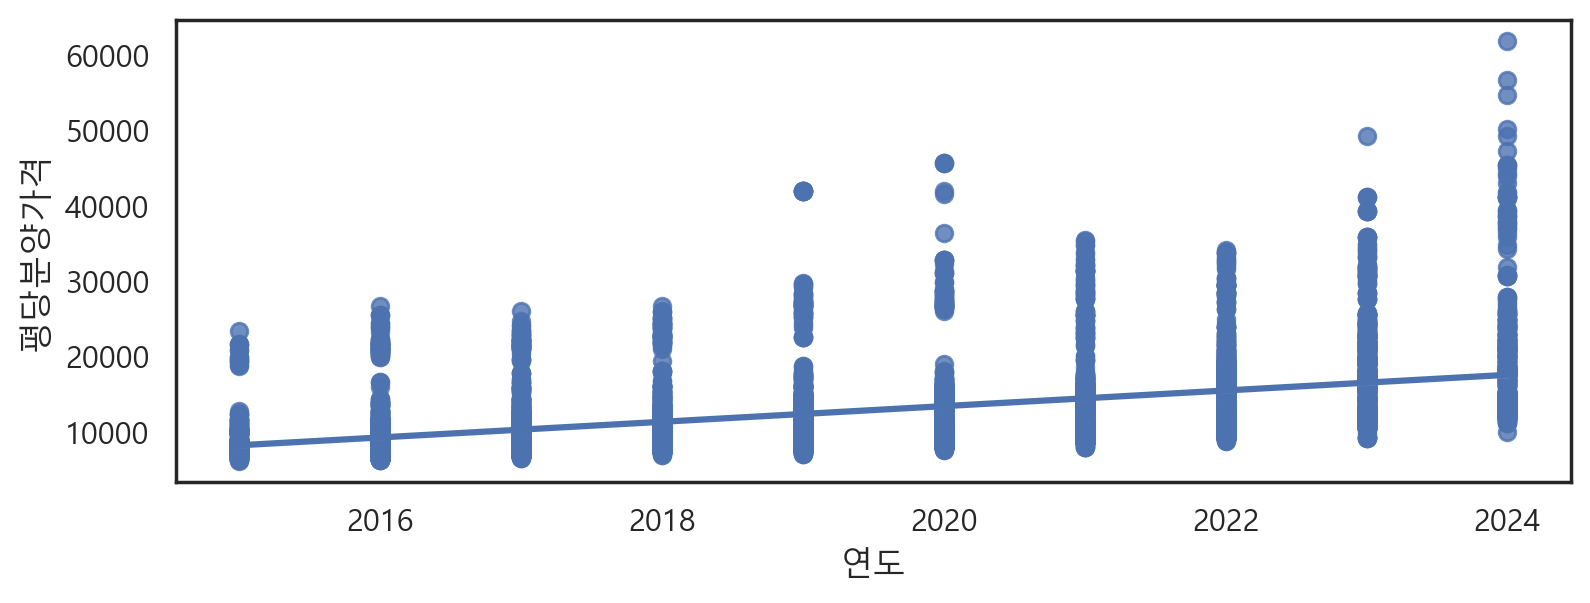

In [458]:
# regplot
sns.regplot(df_last, x='연도', y='평당분양가격')

In [430]:
# swarmplot

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용(교안 20page)

# 10. 구조가 다른 df_first와 df_last를 연결 후 분석
## (1) concat
- new_first :df_first를 [지역명, 연도, 월, 평당분양가격]으로 변환
- new_last : df_last를 [지역명, 연도, 월, 평당분양가격]으로 변환
                (전용면적이 모든면적인 행만 추출후, 전용면적 열을 삭제)

## (2) 결측치 대체(연도별, 지역별 중위값)

## (3) df.csv파일로 출력

## (4) 7절부터 9절까지 분석을 한다(전용면적별 분석은 불가)

- 지역명별 데이터 갯수는 결측치가 없어서 동일(groupby나 pivot_table등으로 확인)
- 지역명별 평당분양가격(groupby, pivot_table, plot, seaborn 연습)
- 연도별 지역명별 평당분양가격(groupby, pivot_table, plot, seaborn 연습)

### ① 지역명별 데이터 행 갯수 : 결과가 1차원 시리즈

### ② 지역별 평당분양가격(평균, 최대값, ... 요약통계량)

In [ ]:
# 지역명당 평당분양가격 시각화(lineplot과 matplotlib의 bar, sns의 barplot)

### ③ 연도별 평당분양가격(평균)

In [ ]:
# 연도별 평당분양가격 시각화(lineplot과 matplotlib의 bar, sns의 barplot)

### ④ 연도, 지역별 평당분양가격(평균)

In [ ]:
# 연도별, 지역별 평당분양가격 시각화(heatmap)

In [ ]:
# 년도별 평균 평당분양가격의 추이

In [ ]:
# 위의 그래프가 겹쳐서 작 보이지 않아 분리

In [ ]:
# 관계형 그래프의 서브플롯을 그리는 함수는 relplot
# 범주형 그래프의 서브플롯을 그리는 함수는 catplot

In [ ]:
# 연도별 평당분양가격의 사분위수


In [ ]:
# 연도별 평당분양가격의 사분위수(분포포함 boxenplot)


In [ ]:
# 연도별 평당분양가격의 사분위수(분포포함 violinplot)


In [ ]:
# 연도에 따른 평당분양가격을 회귀식으로 시각화


In [ ]:
# swarmplot은 많은 데이터를 그리기에는 시간이 많이 걸려 5%만 sampling후 그릴 것을 추천
# 연도별 평당분양가격 산점도
 

In [ ]:
# 분양가격을 hist
